### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import shap


shap.initjs()
# Set the global font to be larger
#plt.rcParams['font.size'] = 20

### Helper Functions

In [76]:
def load_data(dataset, classifier):
    df = pd.read_csv(f'../Data & Outputs/{dataset}/df_encoded.csv')
    with open(f'../Data & Outputs/{dataset}/{classifier}/' \
          f'{dataset}_{classifier}_mul_selected_features.pkl', 'rb') as f:
         seq_fea_sel_features, rfe_cv_features = pickle.load(f)

    return df, seq_fea_sel_features


def preprocess_data(df, features):
    Y = df['churn']
    X = df[features]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test


def create_model(classifier):
    if classifier == 'RF':
        model = RandomForestClassifier(n_jobs=-1, random_state=42)
    elif classifier == 'BRF':
        model = BalancedRandomForestClassifier(n_jobs=-1, sampling_strategy='all',
                                            replacement=True,
                                             bootstrap=False, random_state=42)
    else:
        model = XGBClassifier(n_jobs=-1, random_state=42)
    return model


def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model


def calculate_shap_values(model, X_test):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    return shap_values, explainer


def generate_summary_plot(shap_values, classifier, X_test):

    # Create the summary plot
    shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
    fig = plt.gcf()
    fig.set_figwidth(14)
    fig.set_figheight(8)
    ax = plt.gca()
    ax.set_title('Feature Importance (Summary)')
    plt.show()

def generate_beeswarm_plot(shap_values, X_test):

    # Create the beeswarm plot
    shap.summary_plot(shap_values, X_test, show=False)
    fig = plt.gcf()
    fig.set_figwidth(14)
    fig.set_figheight(8)
    ax = plt.gca()
    ax.set_title('Feature Importance (Beeswarm)')
    plt.show()
   
def generate_force_plot(explainer, shap_values, X_test, ind_list):
    for i in ind_list:
        fig = shap.force_plot(explainer.expected_value, shap_values[i,:], X_test.iloc[i,:], matplotlib=True, show=False)
        fig = plt.gcf()
        fig.set_figwidth(24)
        fig.set_figheight(6)
        plt.show() 
        plt.close(fig)

def generate_dependence_plot(shap_values, X_test, feature_name):

    shap.dependence_plot(feature_name, shap_values, X_test, show=False)
    fig = plt.gcf()
    fig.set_figwidth(12)
    fig.set_figheight(8)
    ax = plt.gca()
    ax.set_title(f'SHAP Dependence Plot for {feature_name}')
    plt.show()


### Run Script

In [77]:
datasets = ['Orange', 'IBM']
classifiers = ['RF', 'BRF', 'XGB']

Printing SHAP plots for Orange dataset and RF classifier
------------------------------------


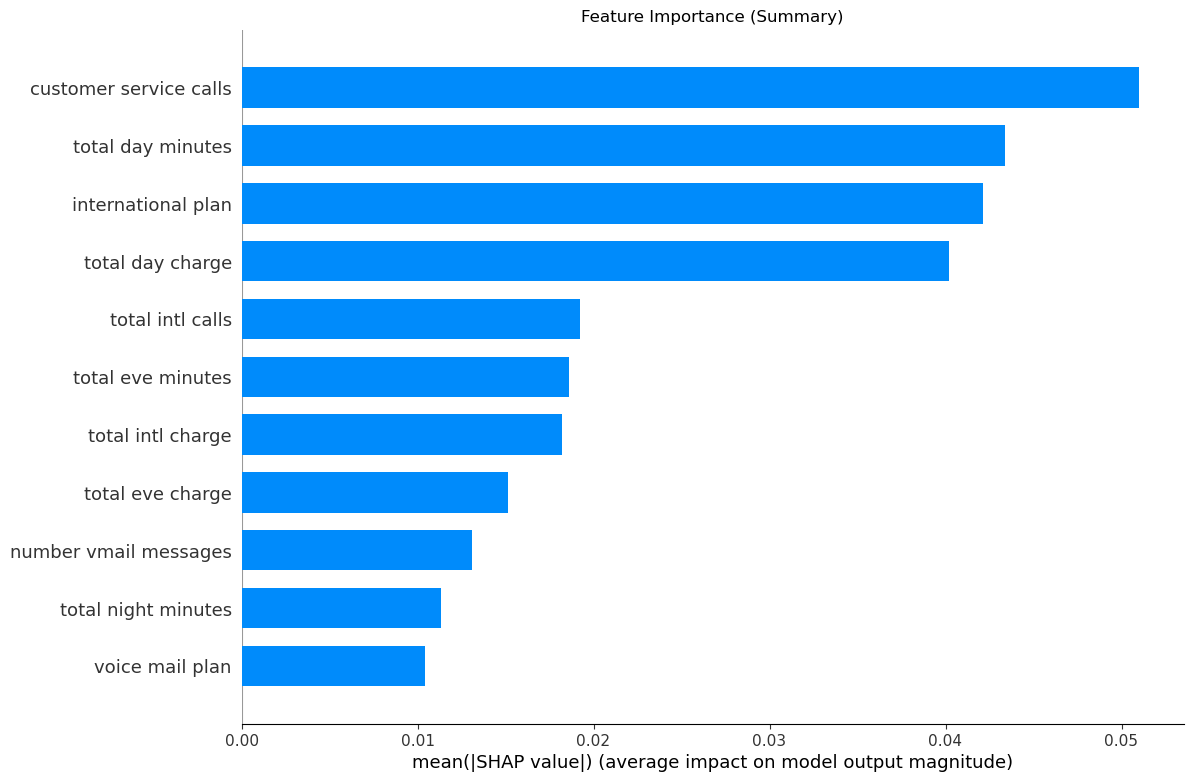

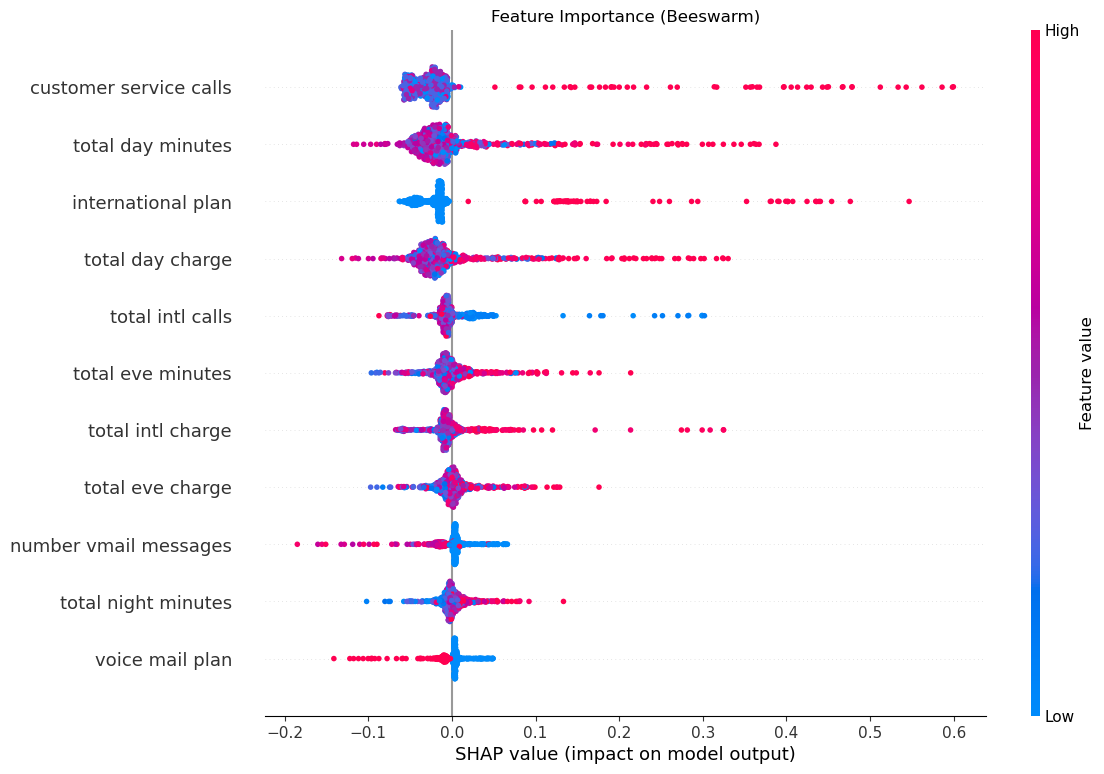

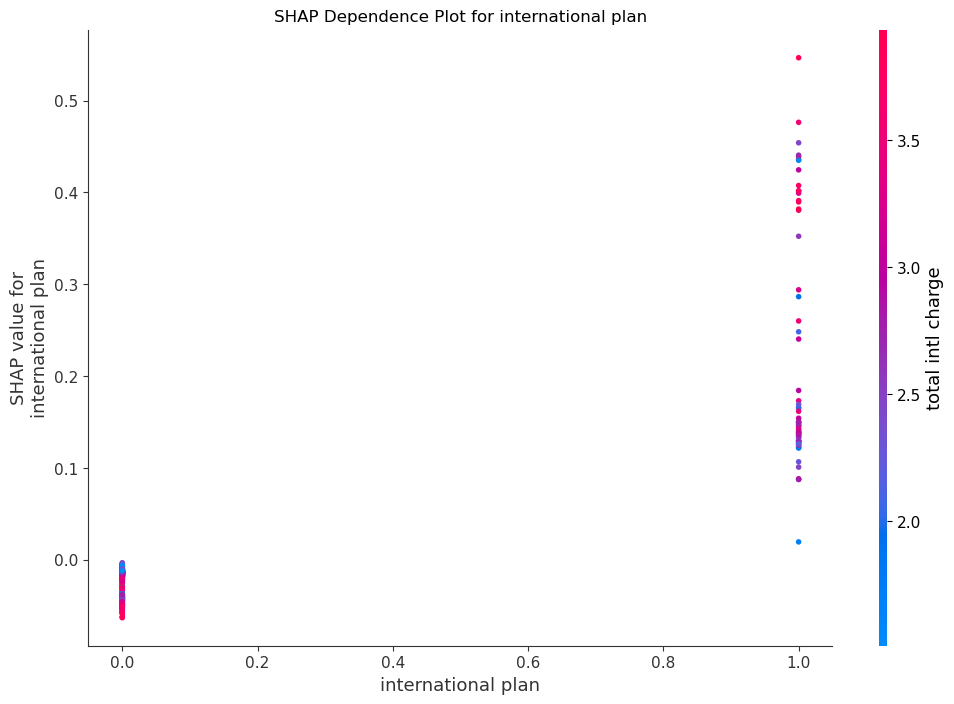

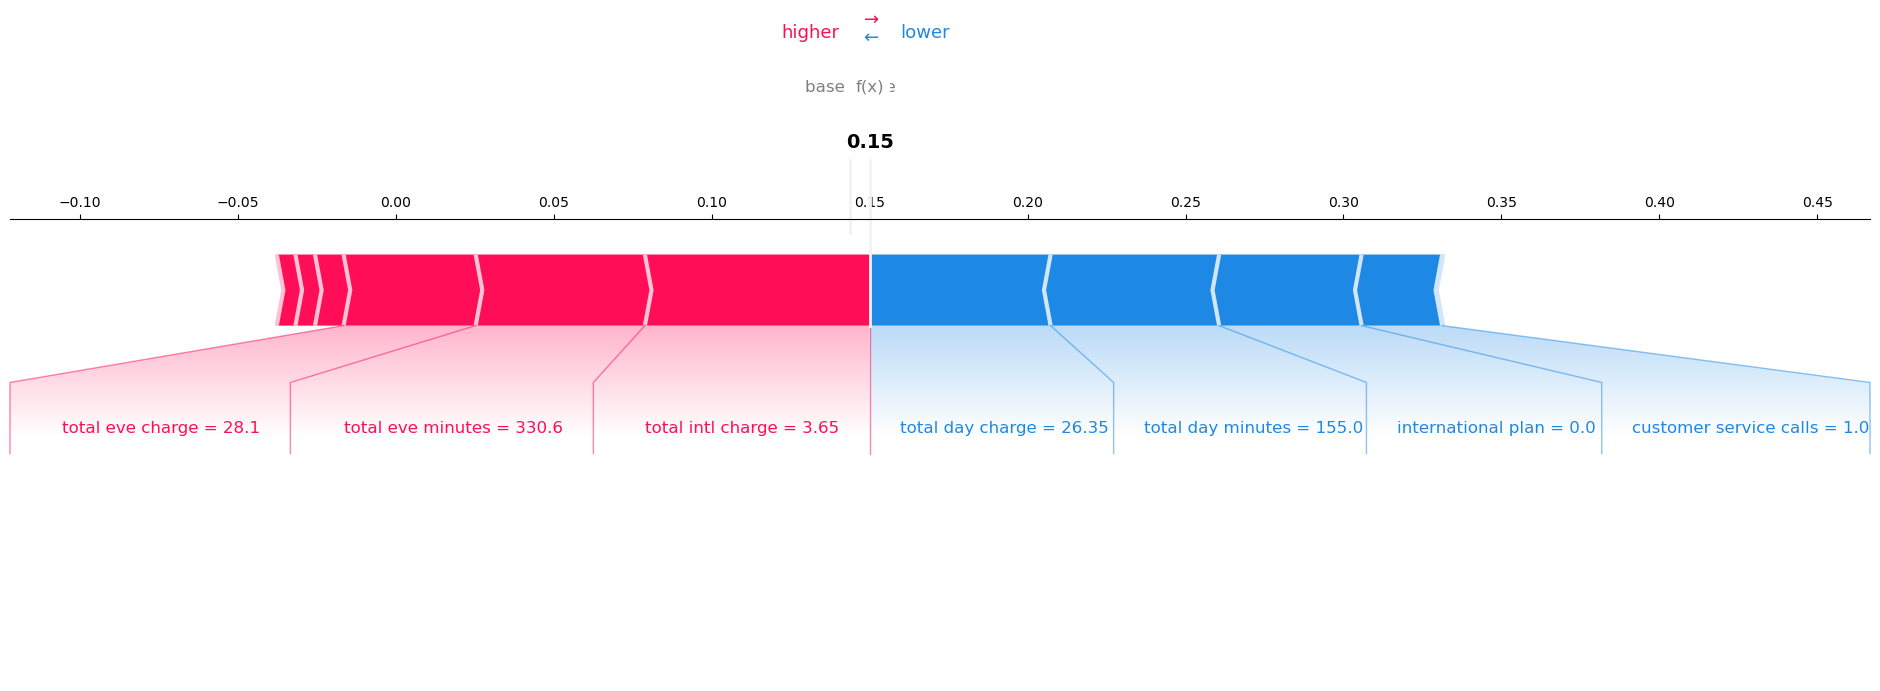

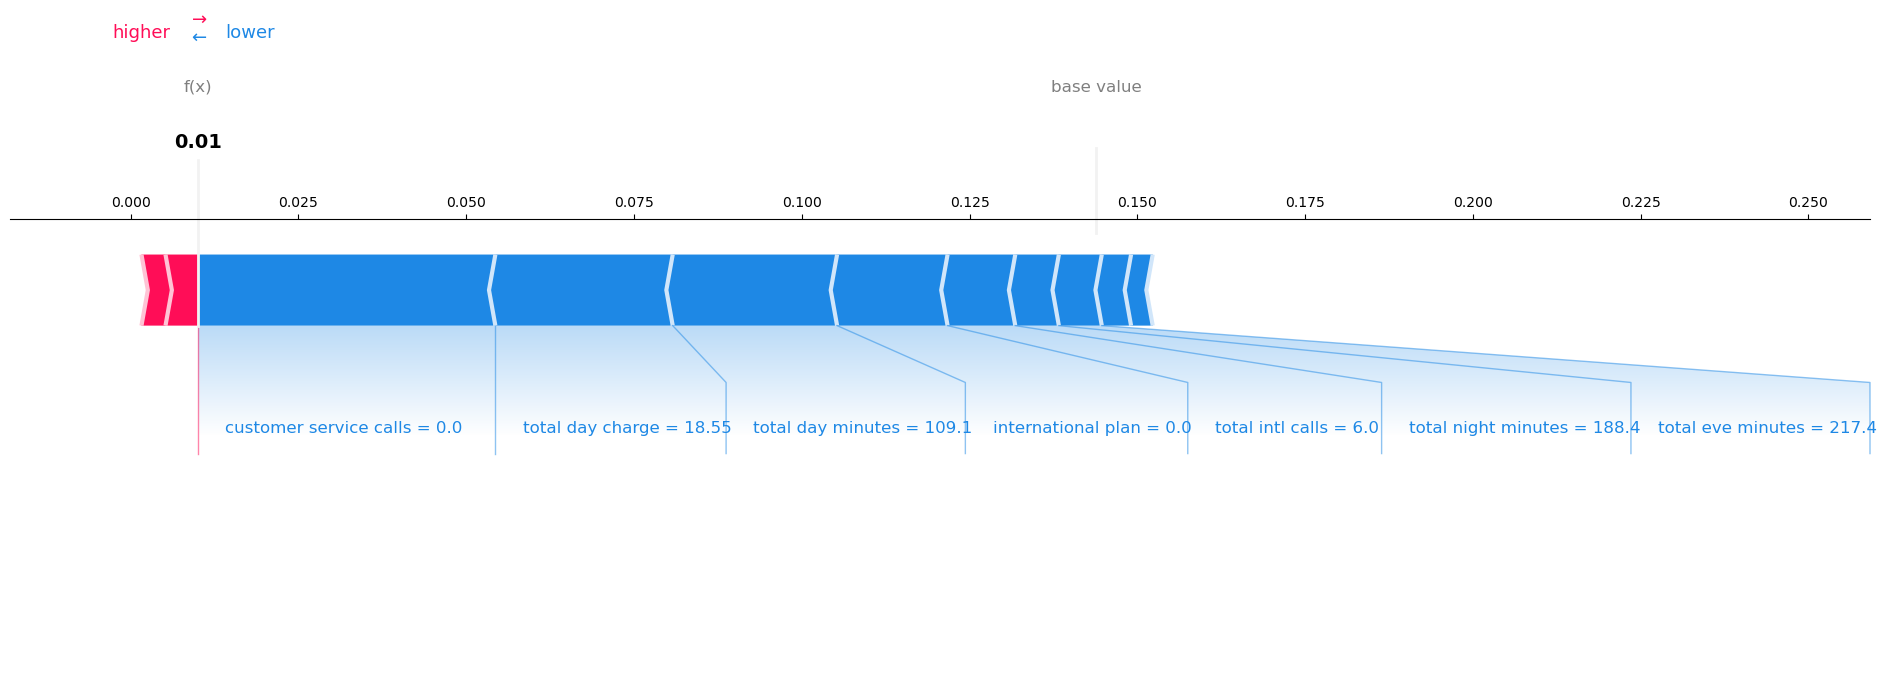

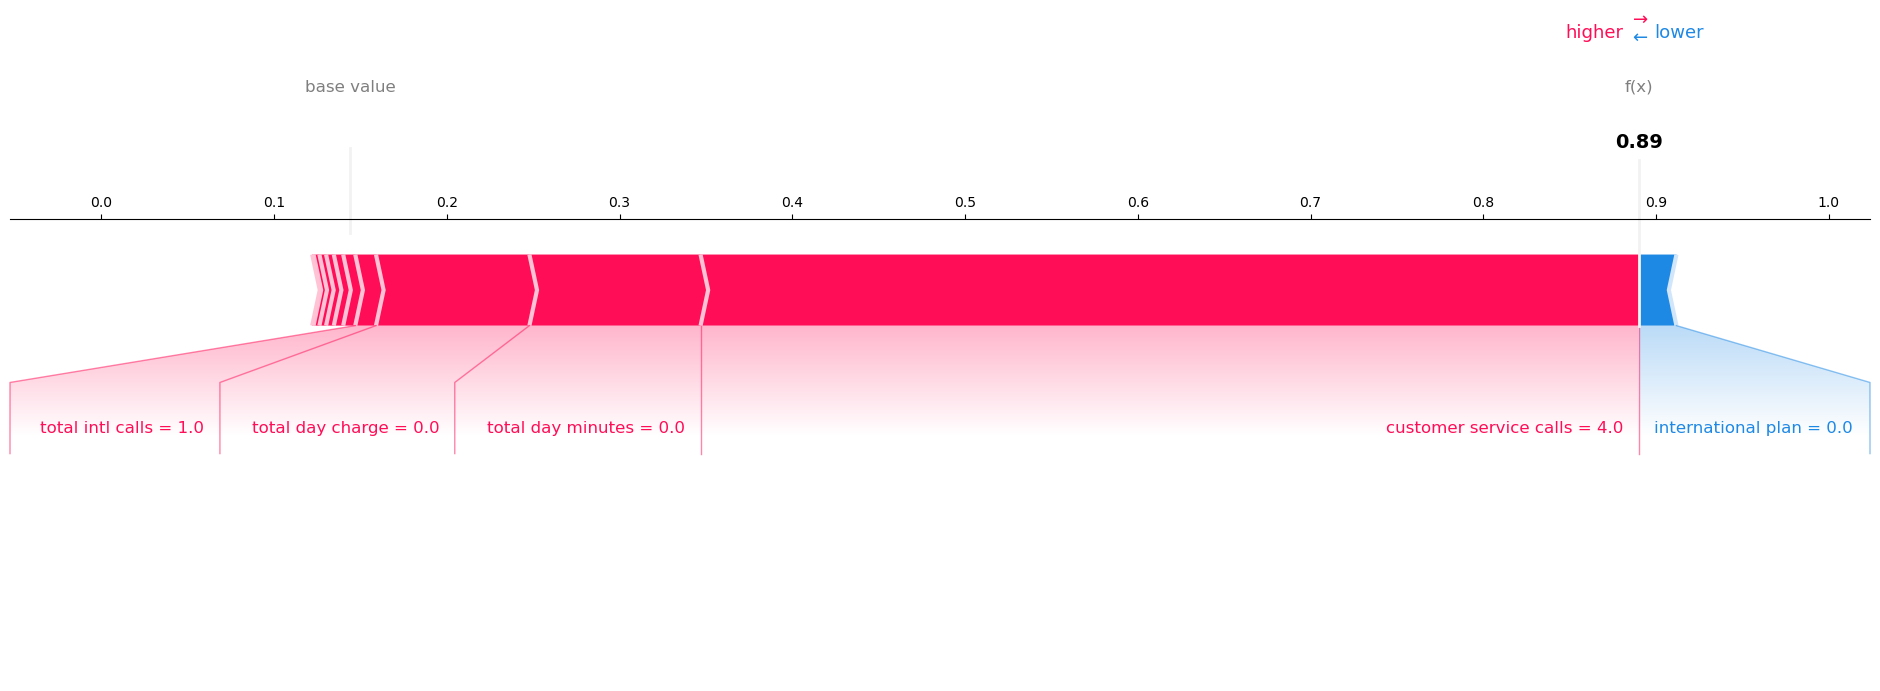

Printing SHAP plots for Orange dataset and BRF classifier
------------------------------------


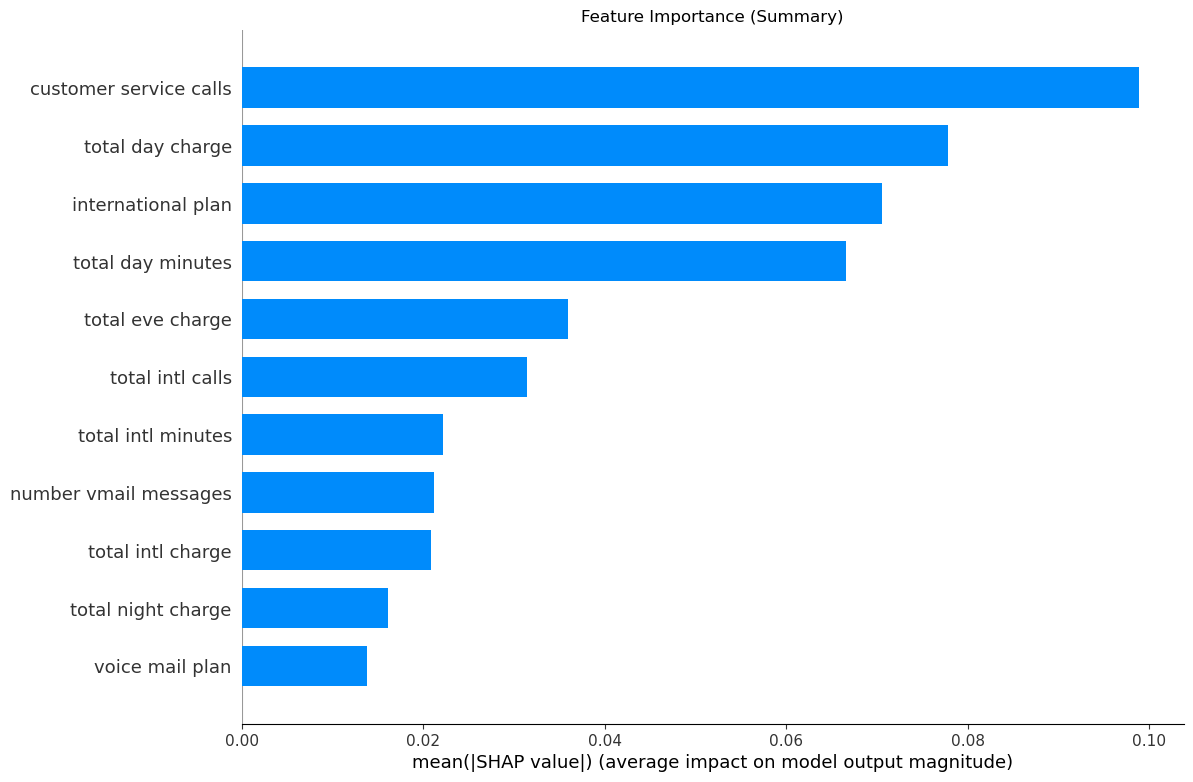

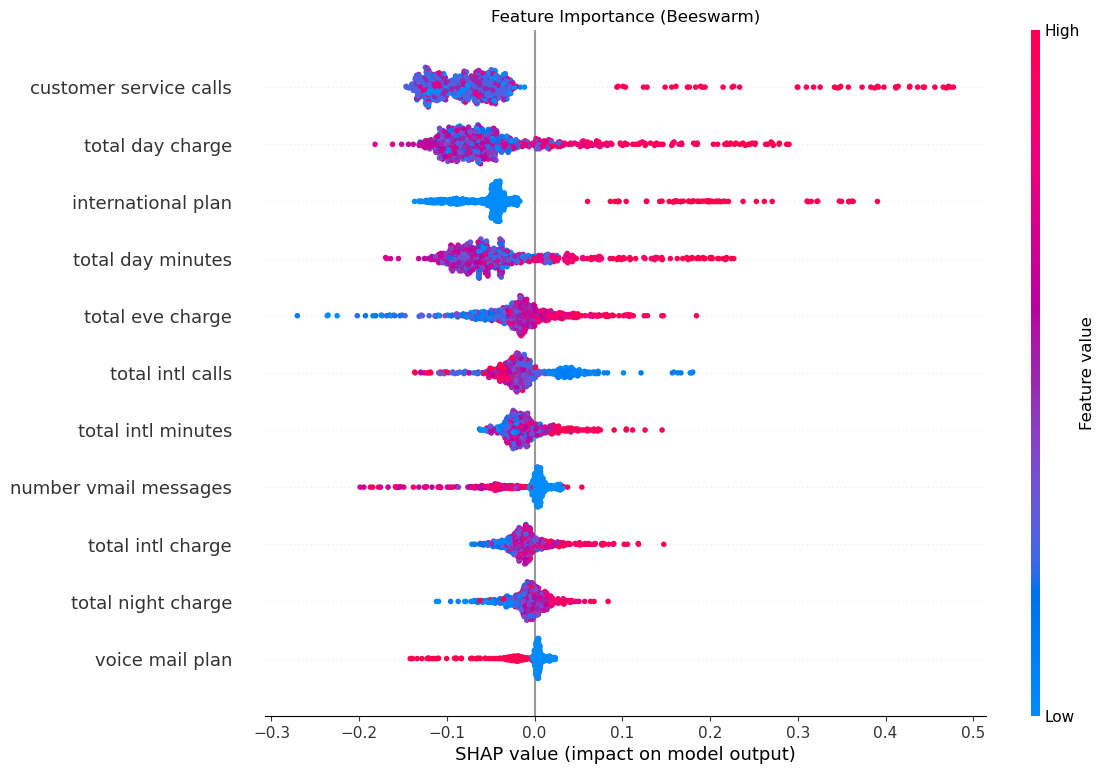

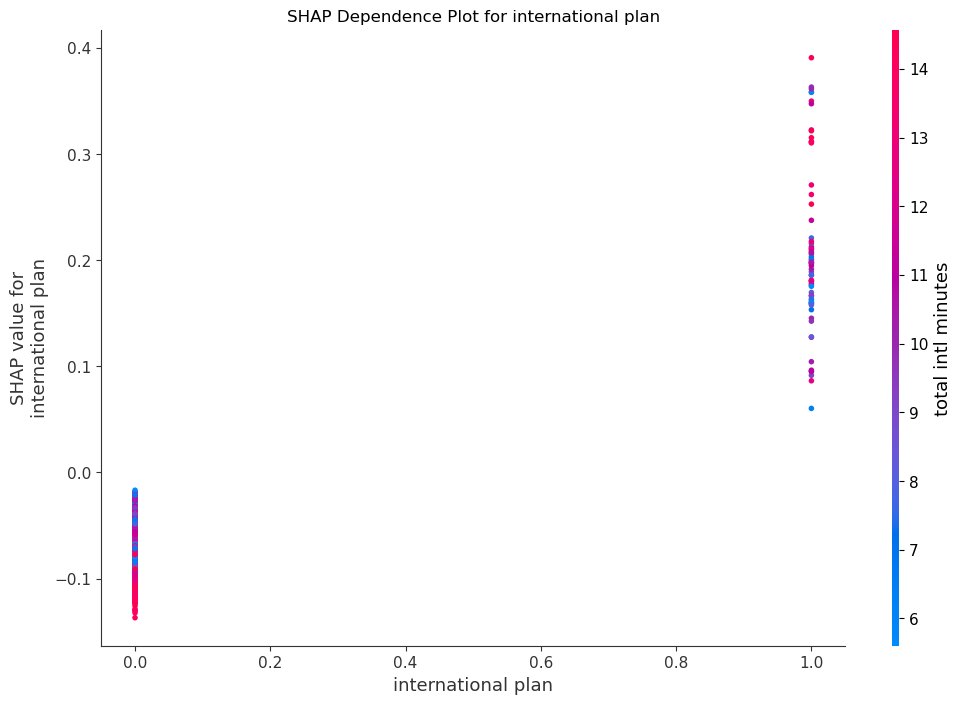

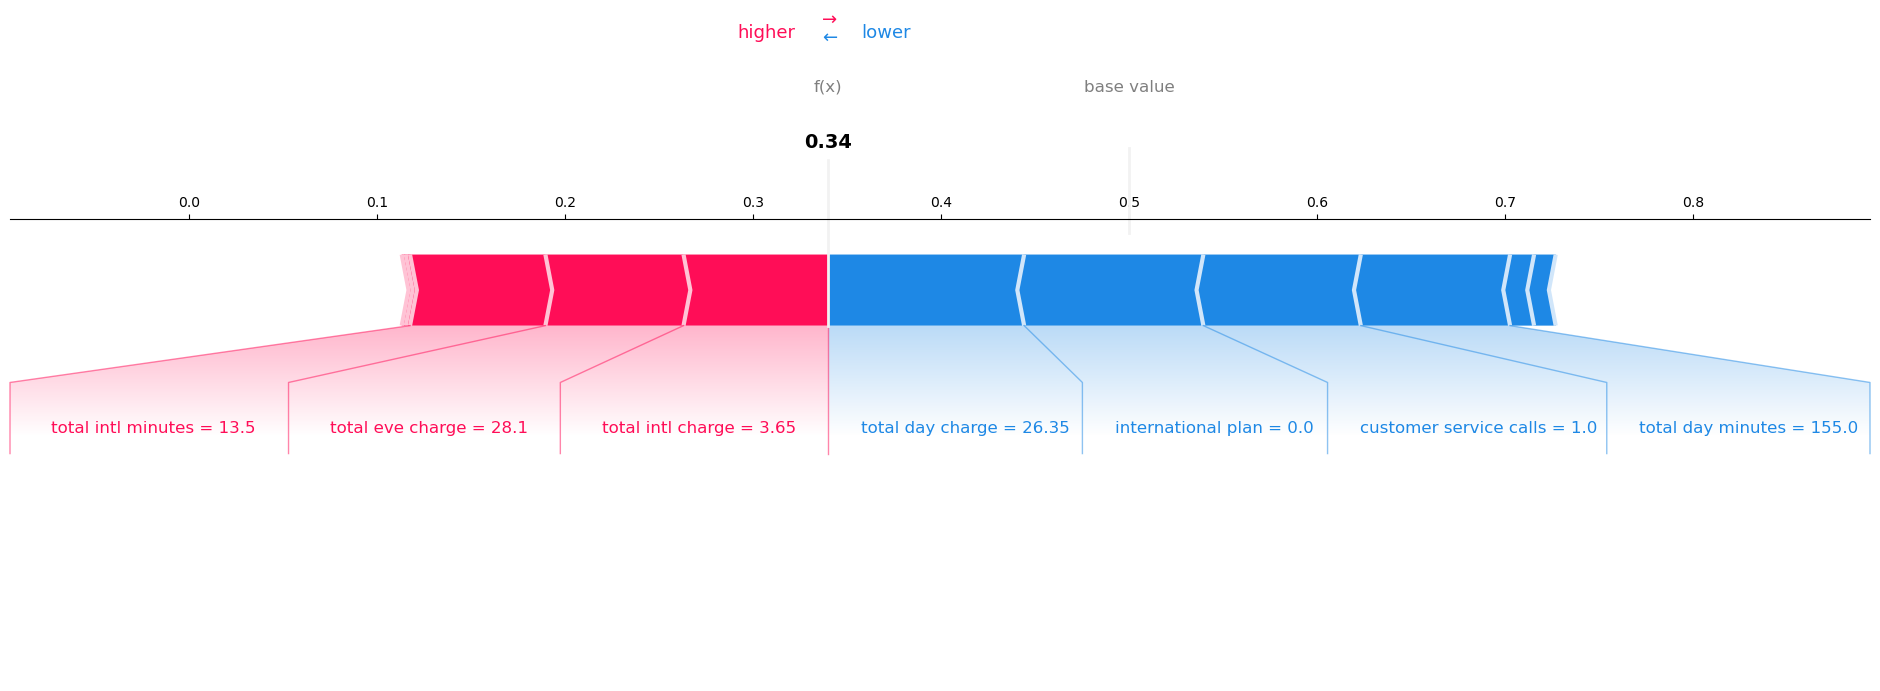

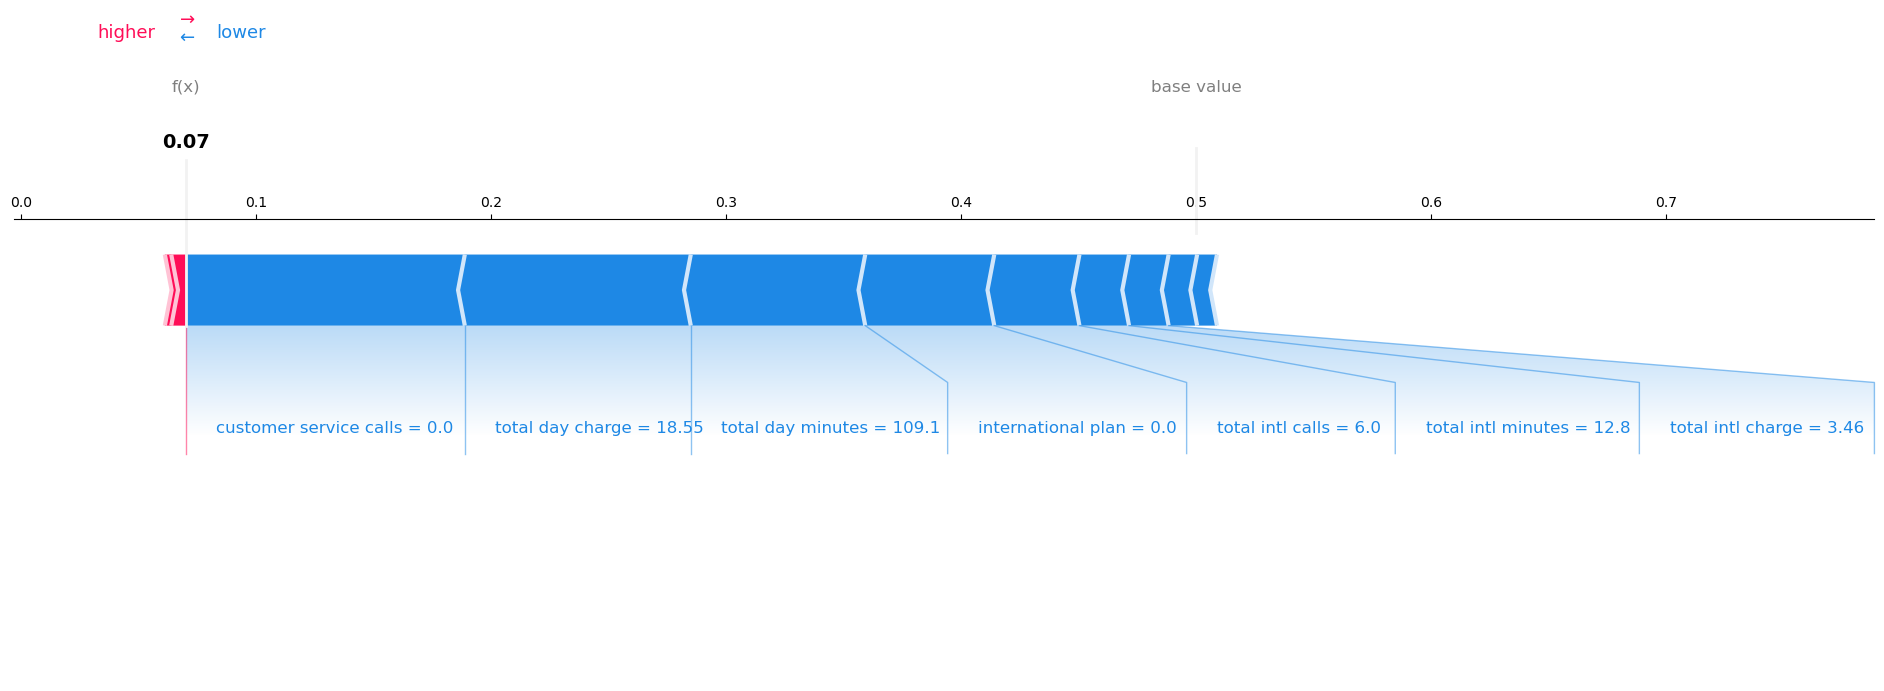

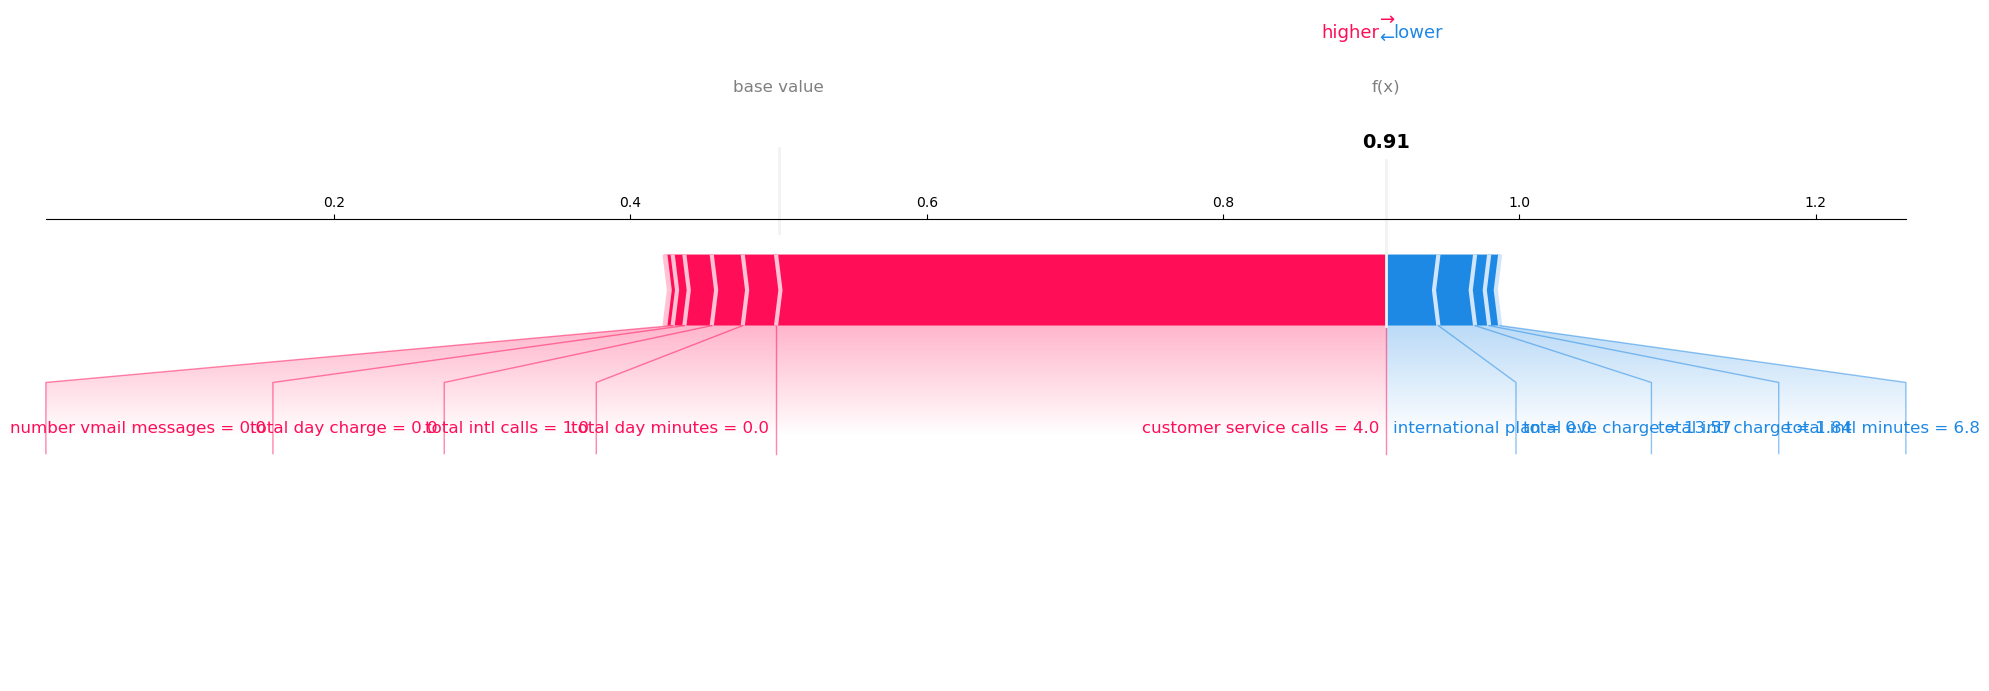

Printing SHAP plots for Orange dataset and XGB classifier
------------------------------------


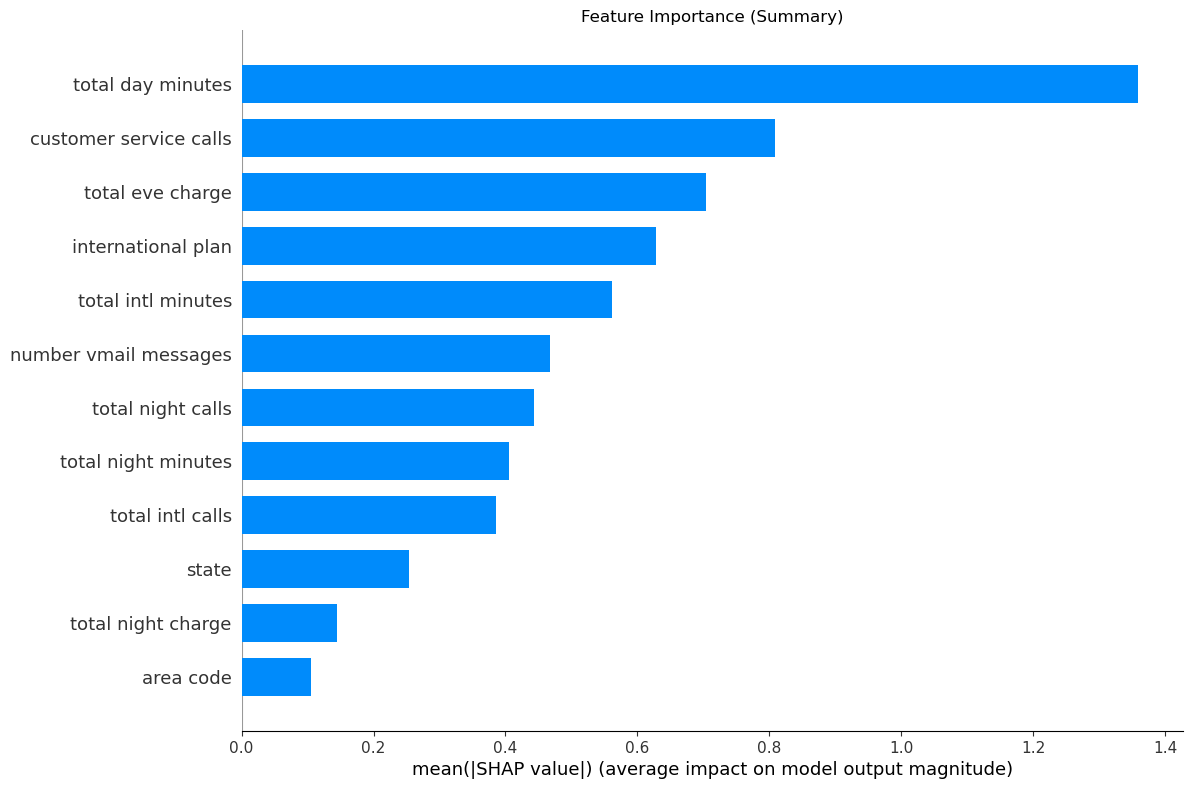

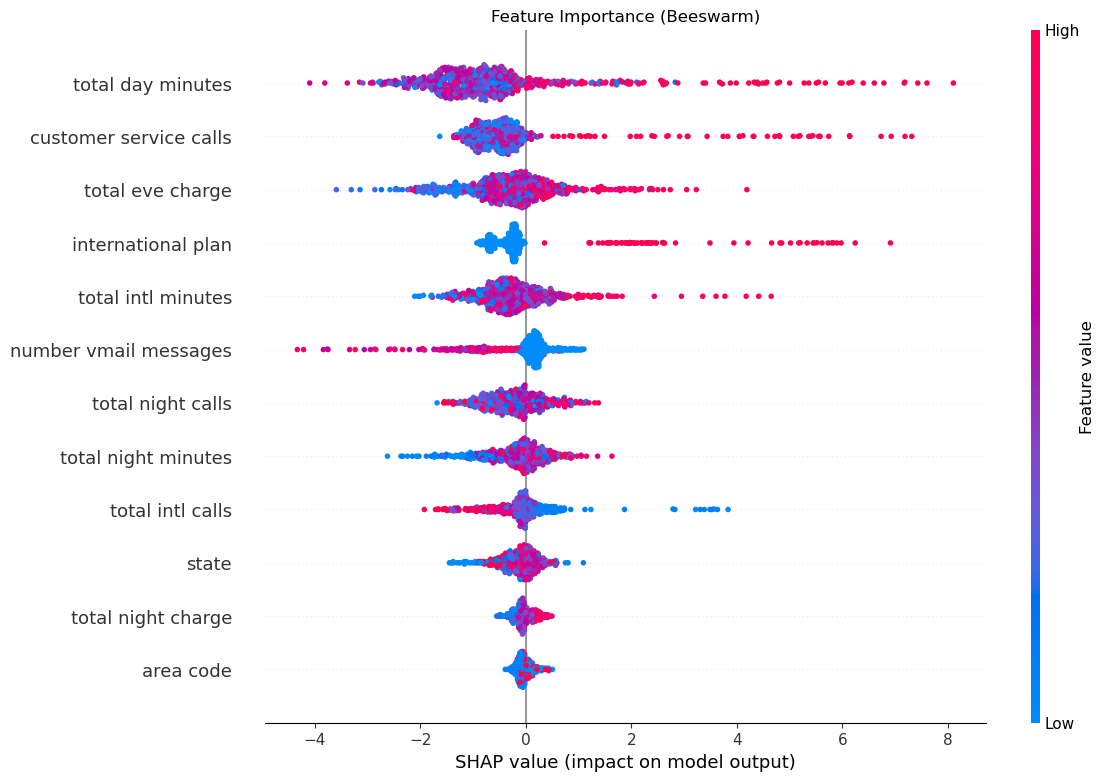

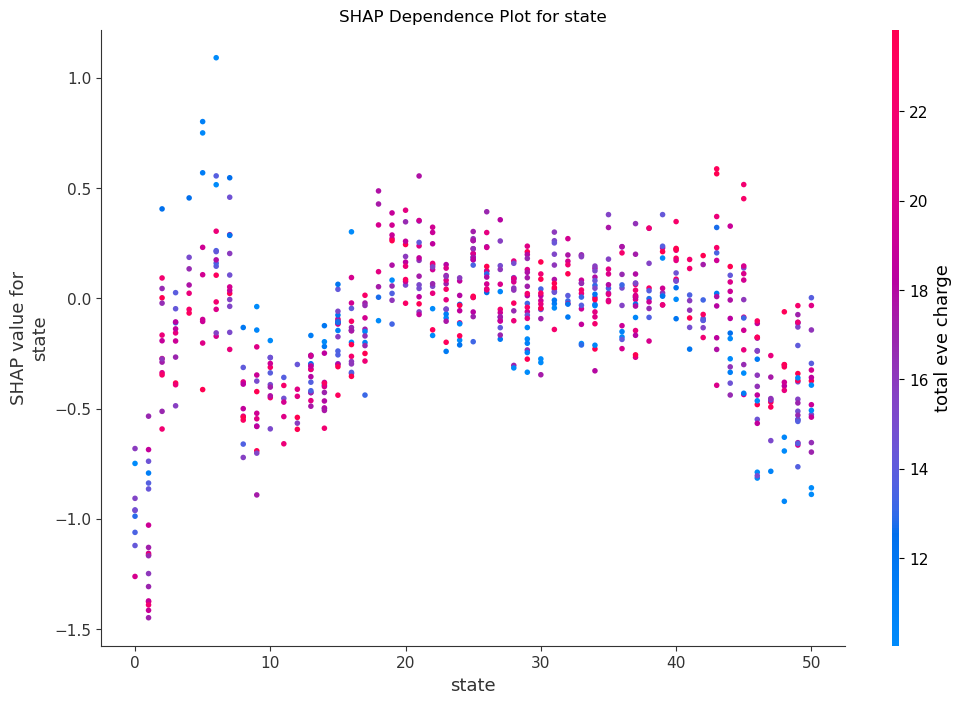

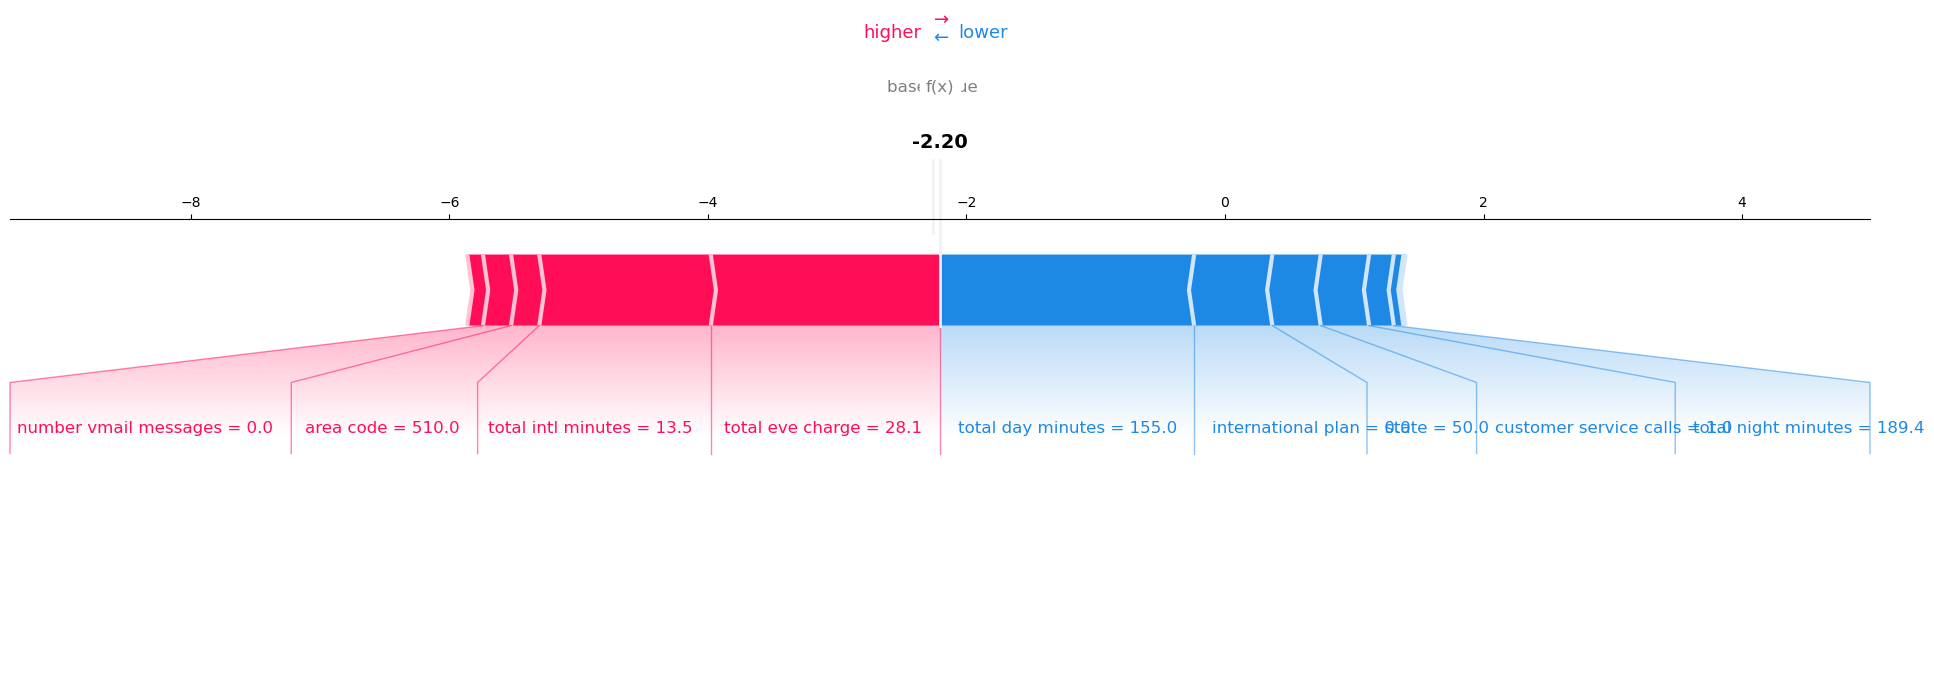

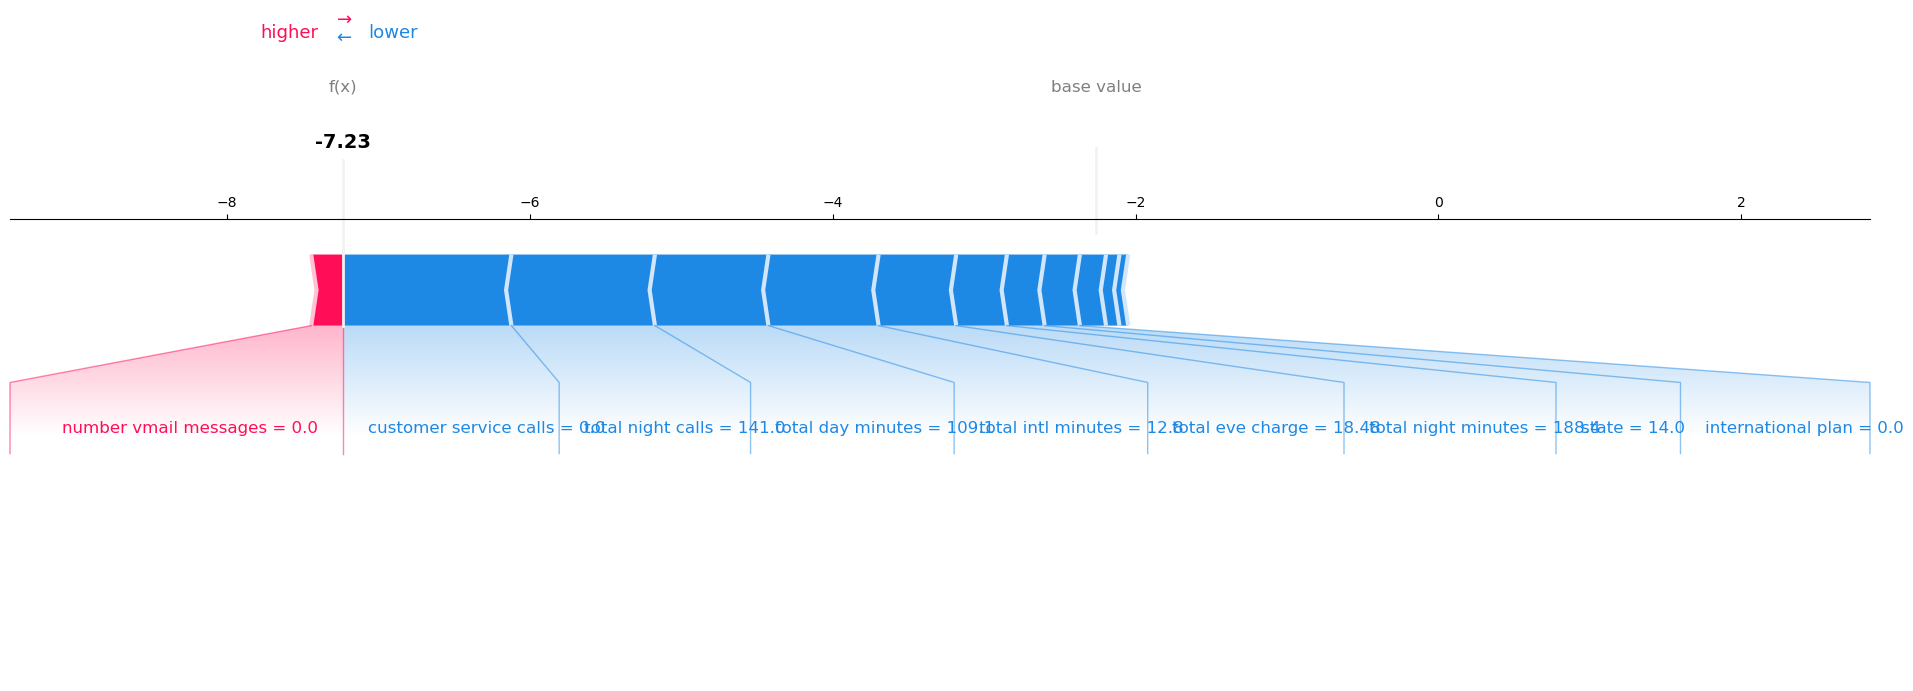

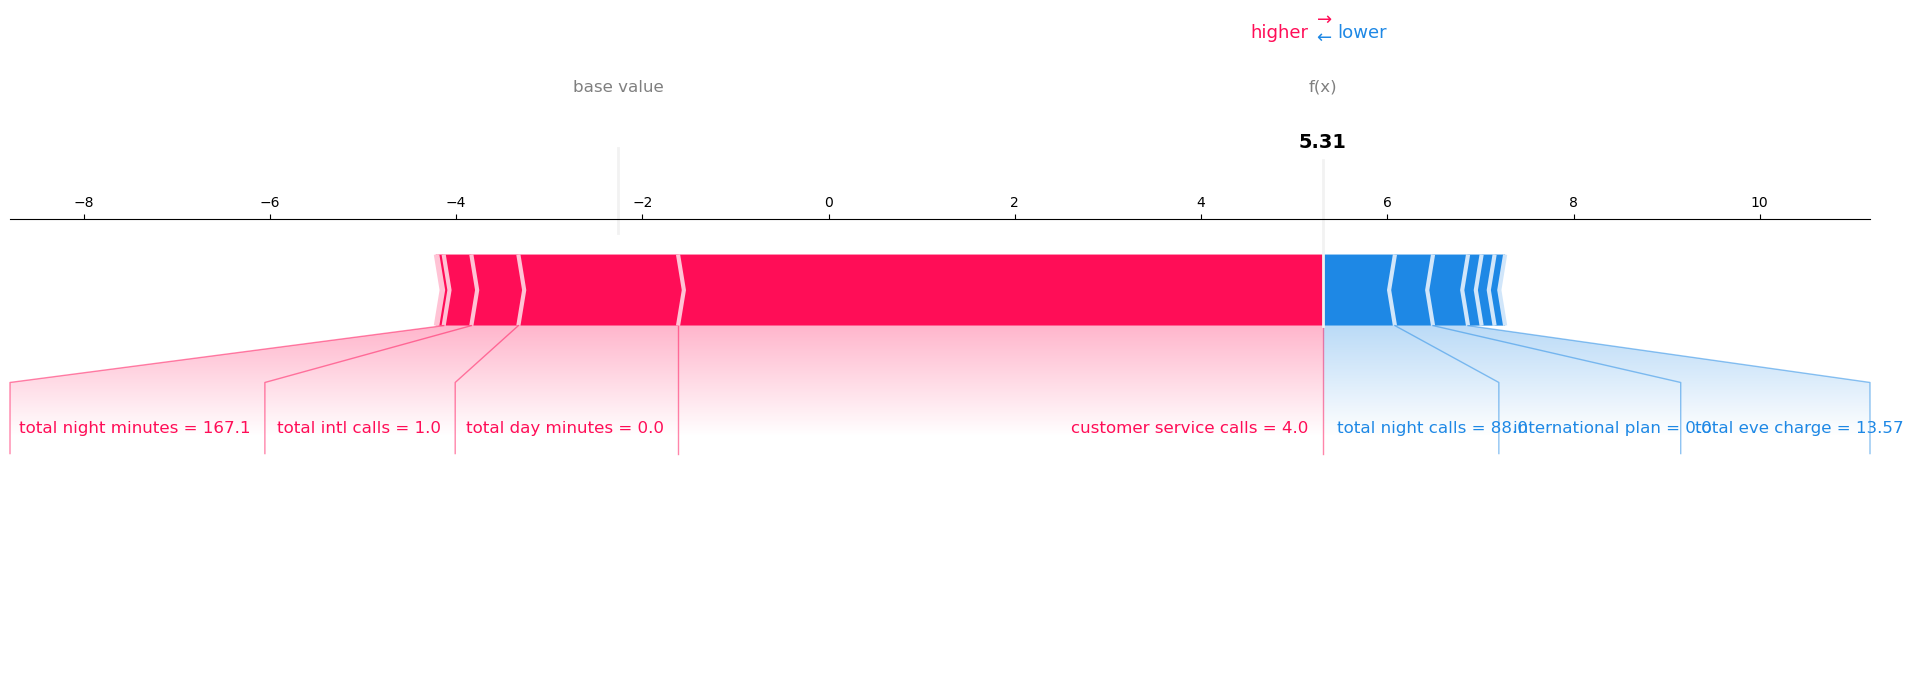

Printing SHAP plots for IBM dataset and RF classifier
------------------------------------


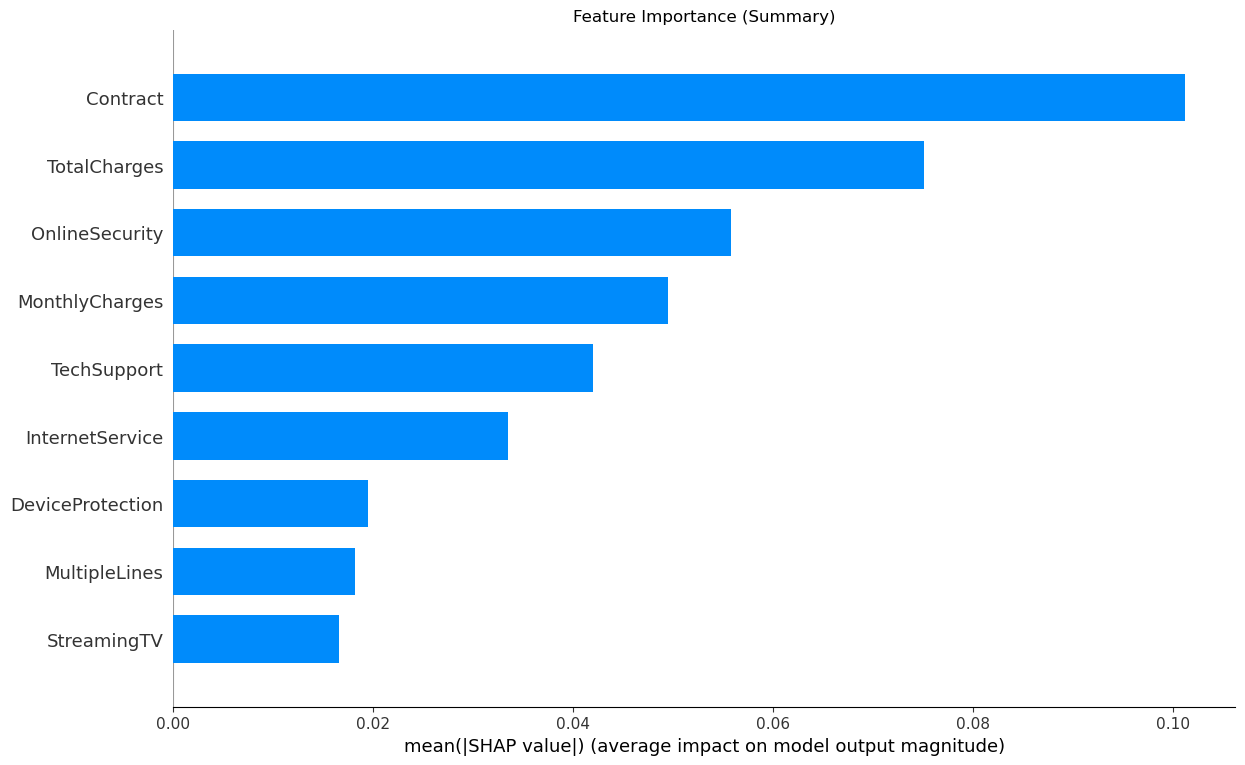

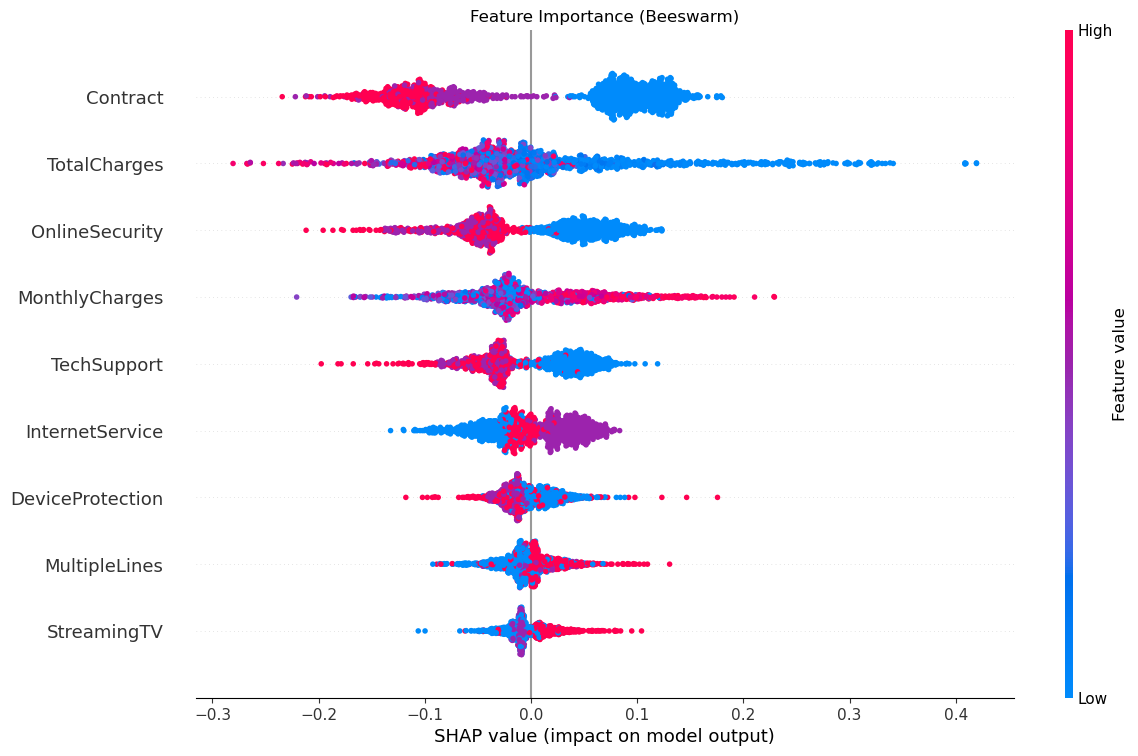

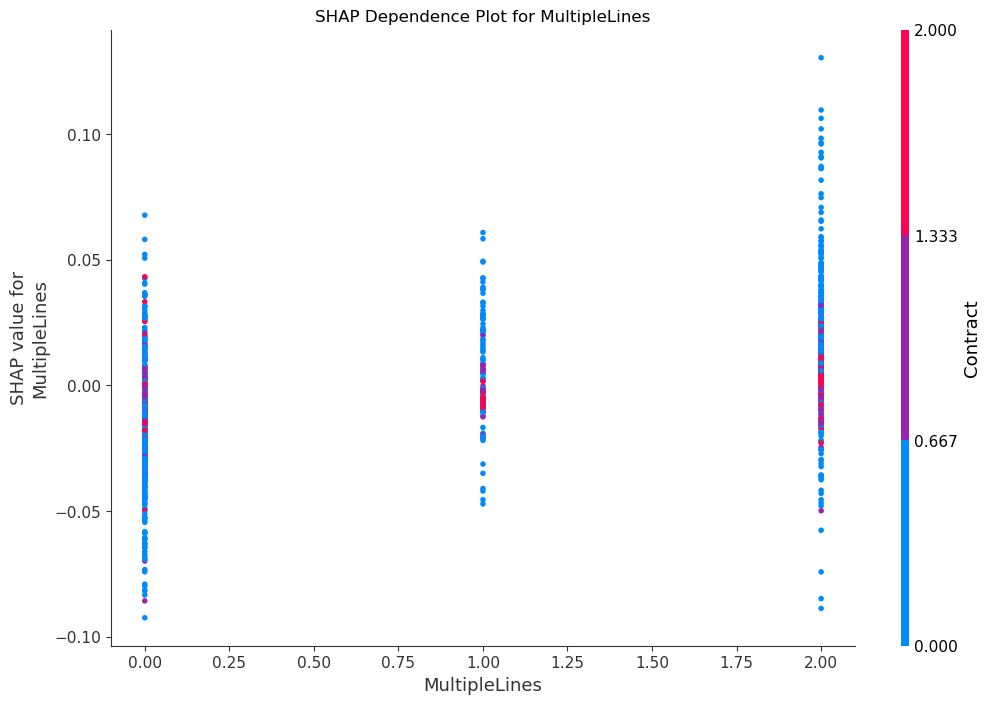

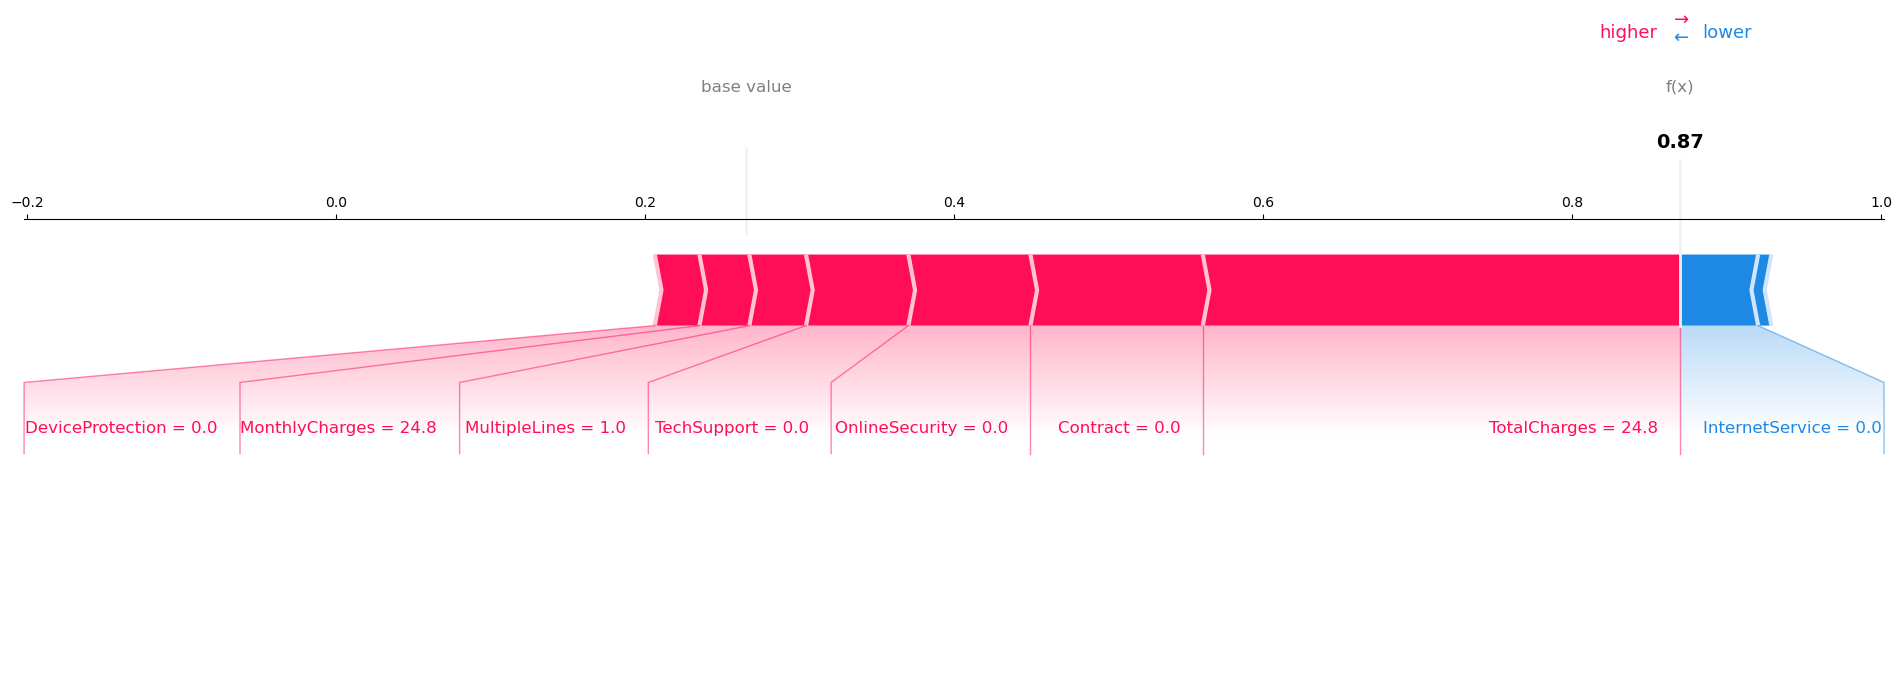

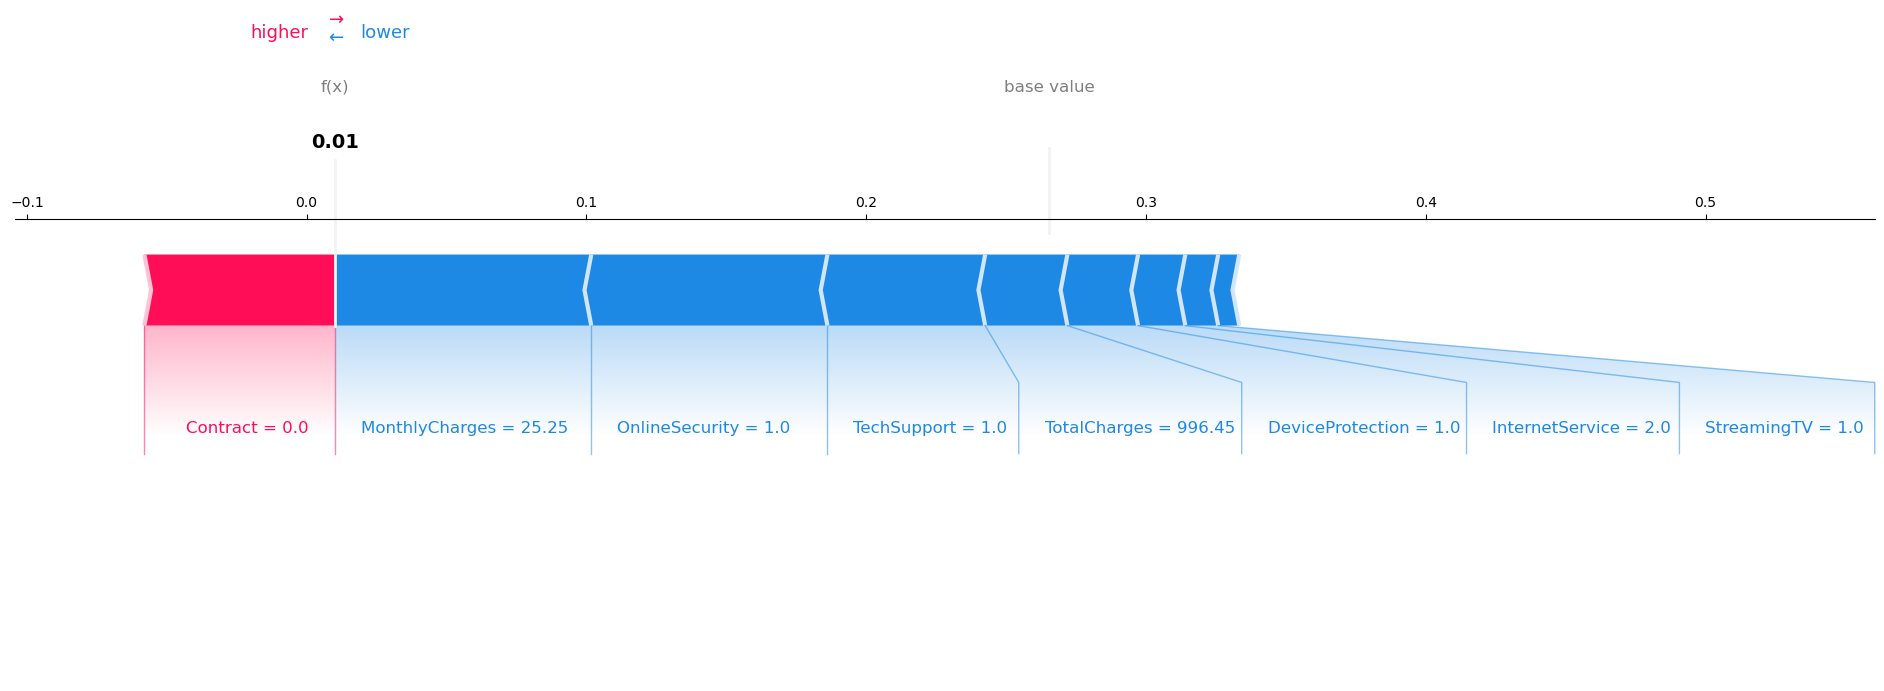

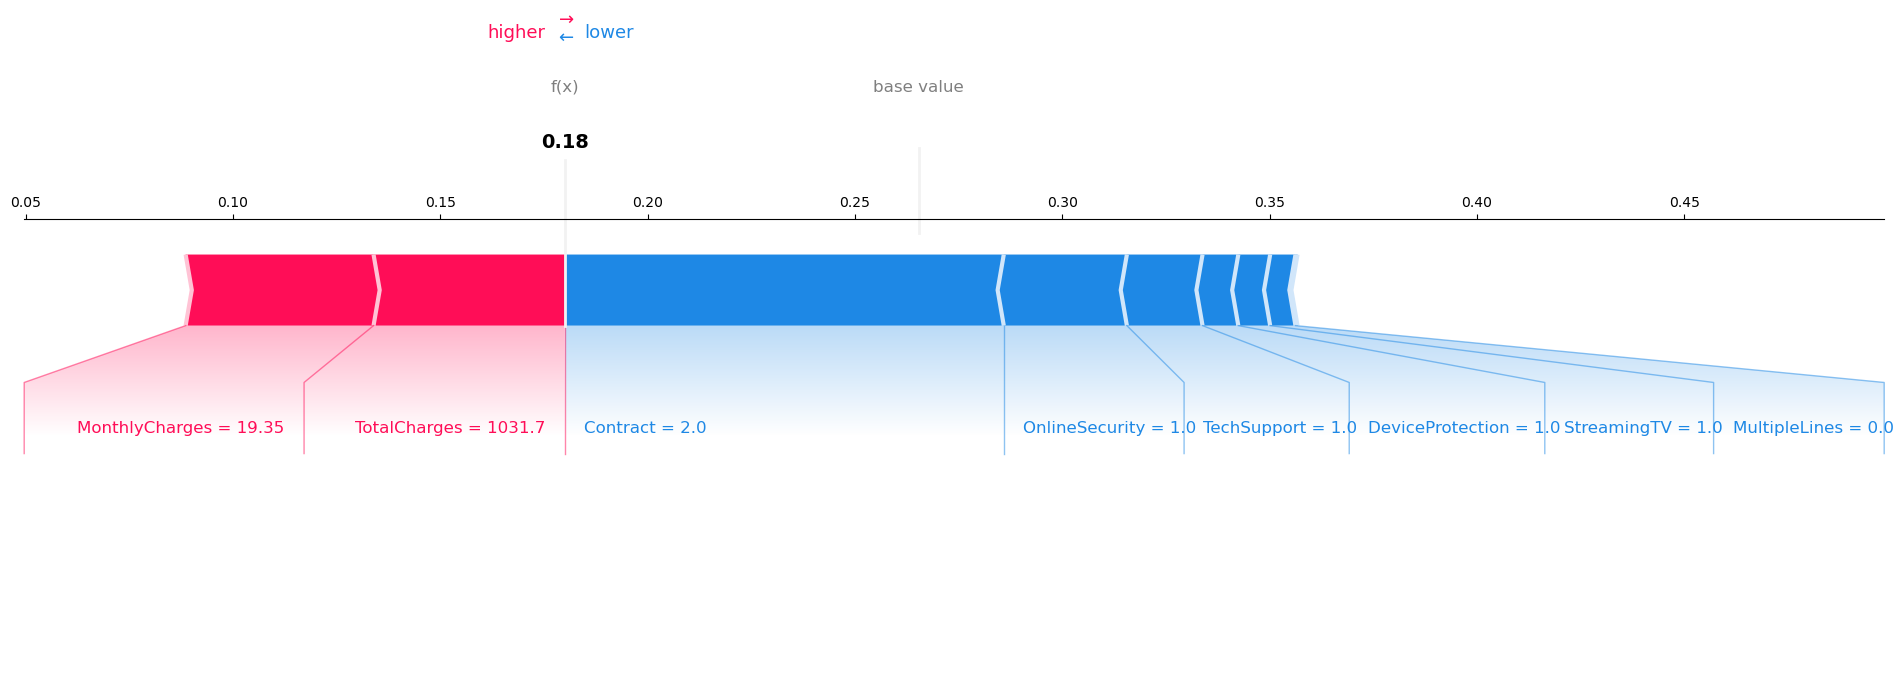

Printing SHAP plots for IBM dataset and BRF classifier
------------------------------------


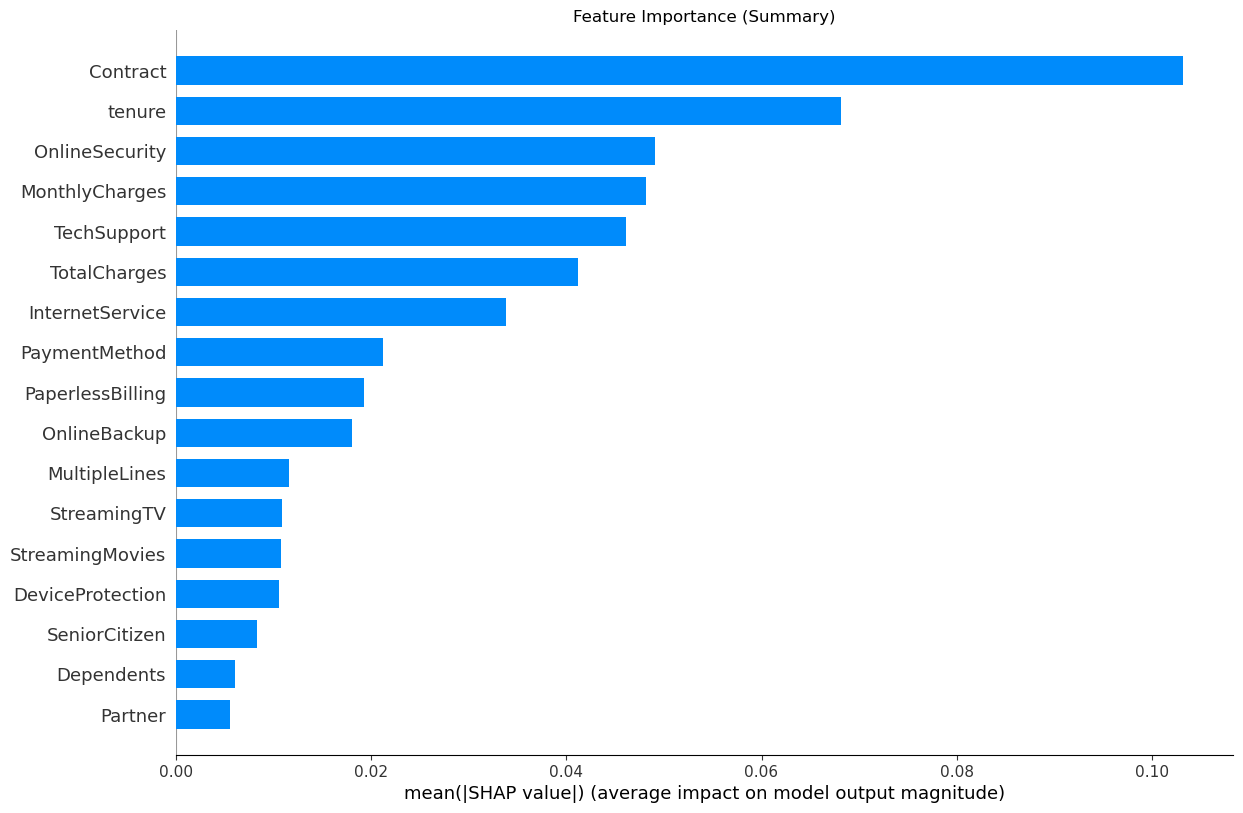

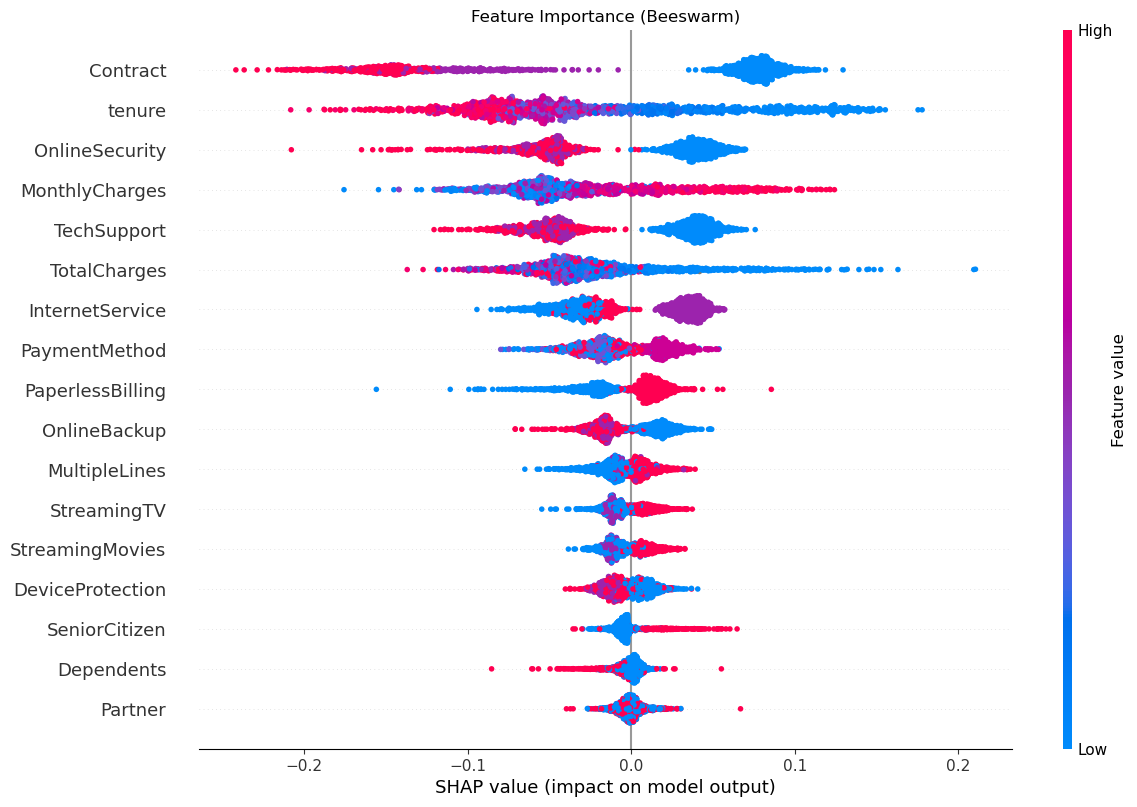

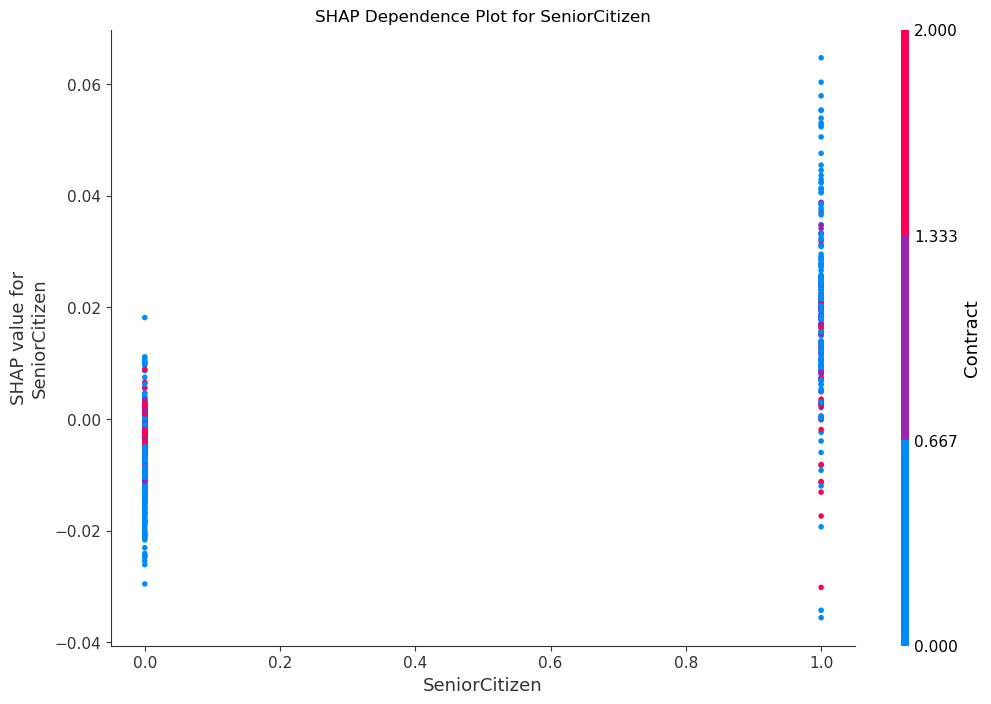

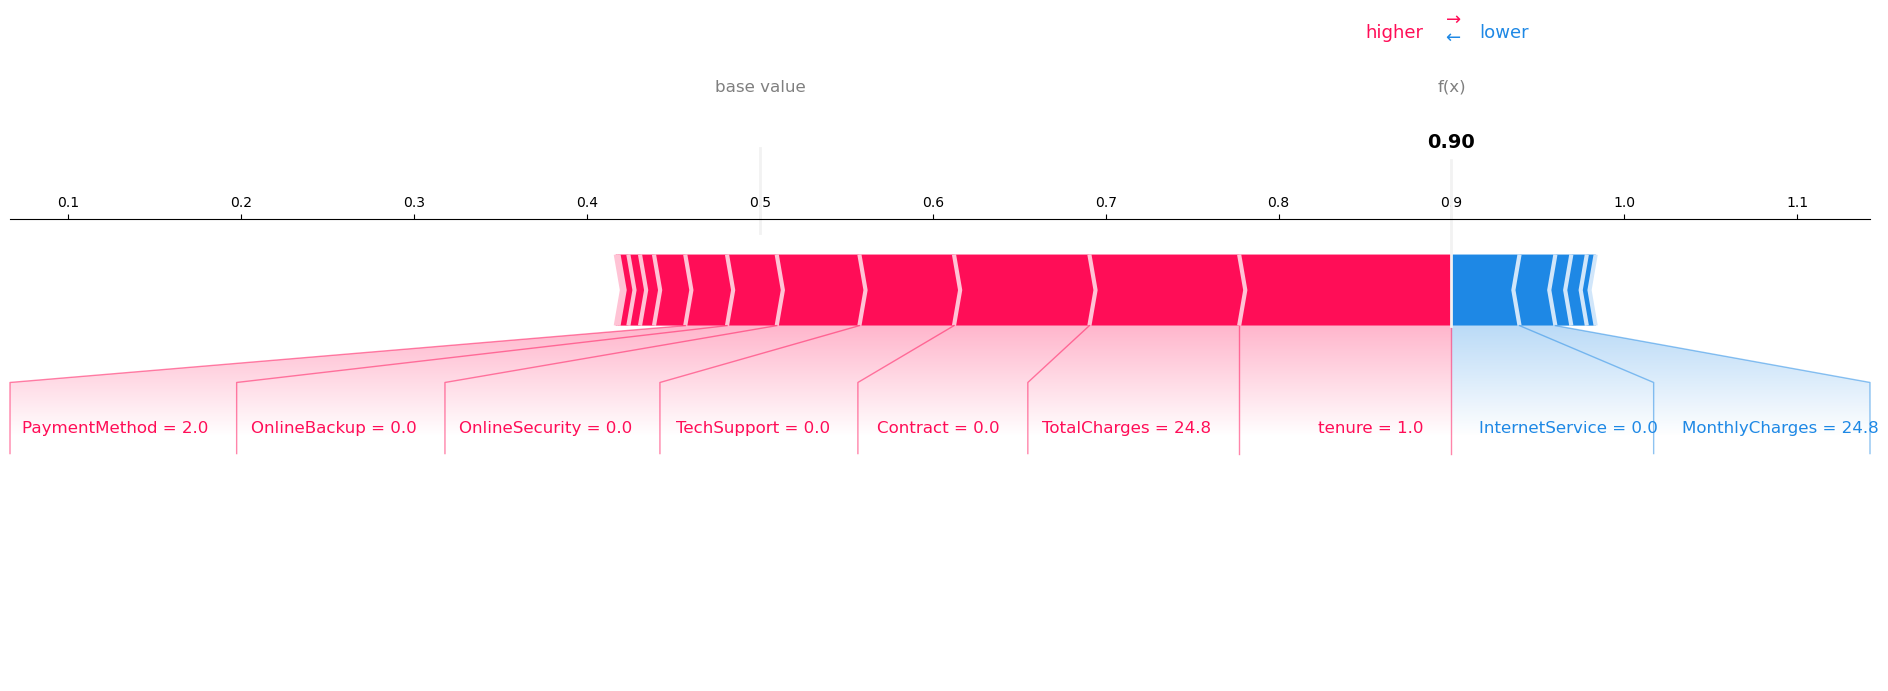

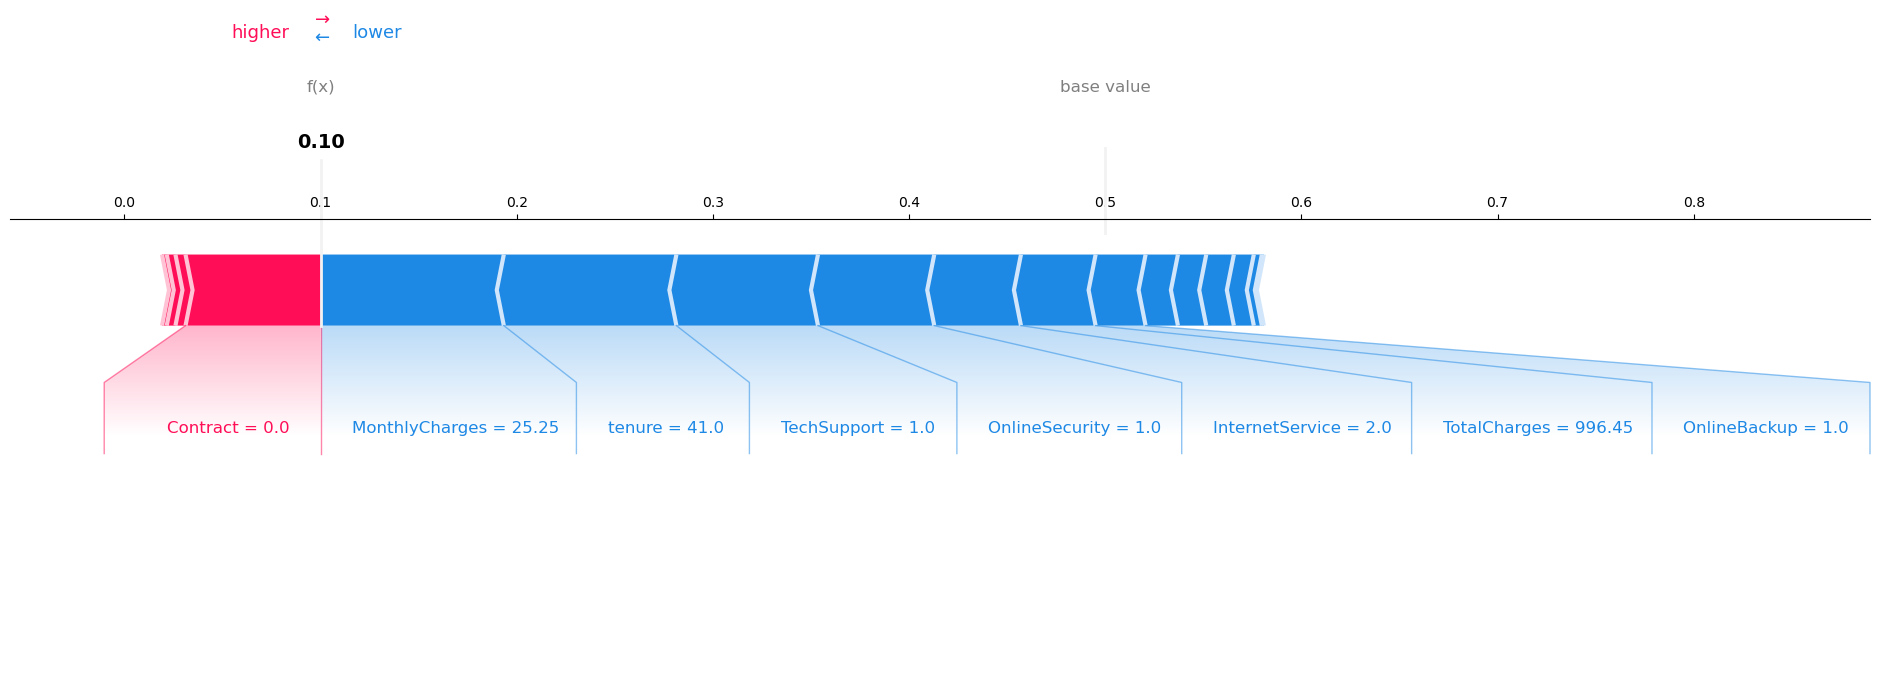

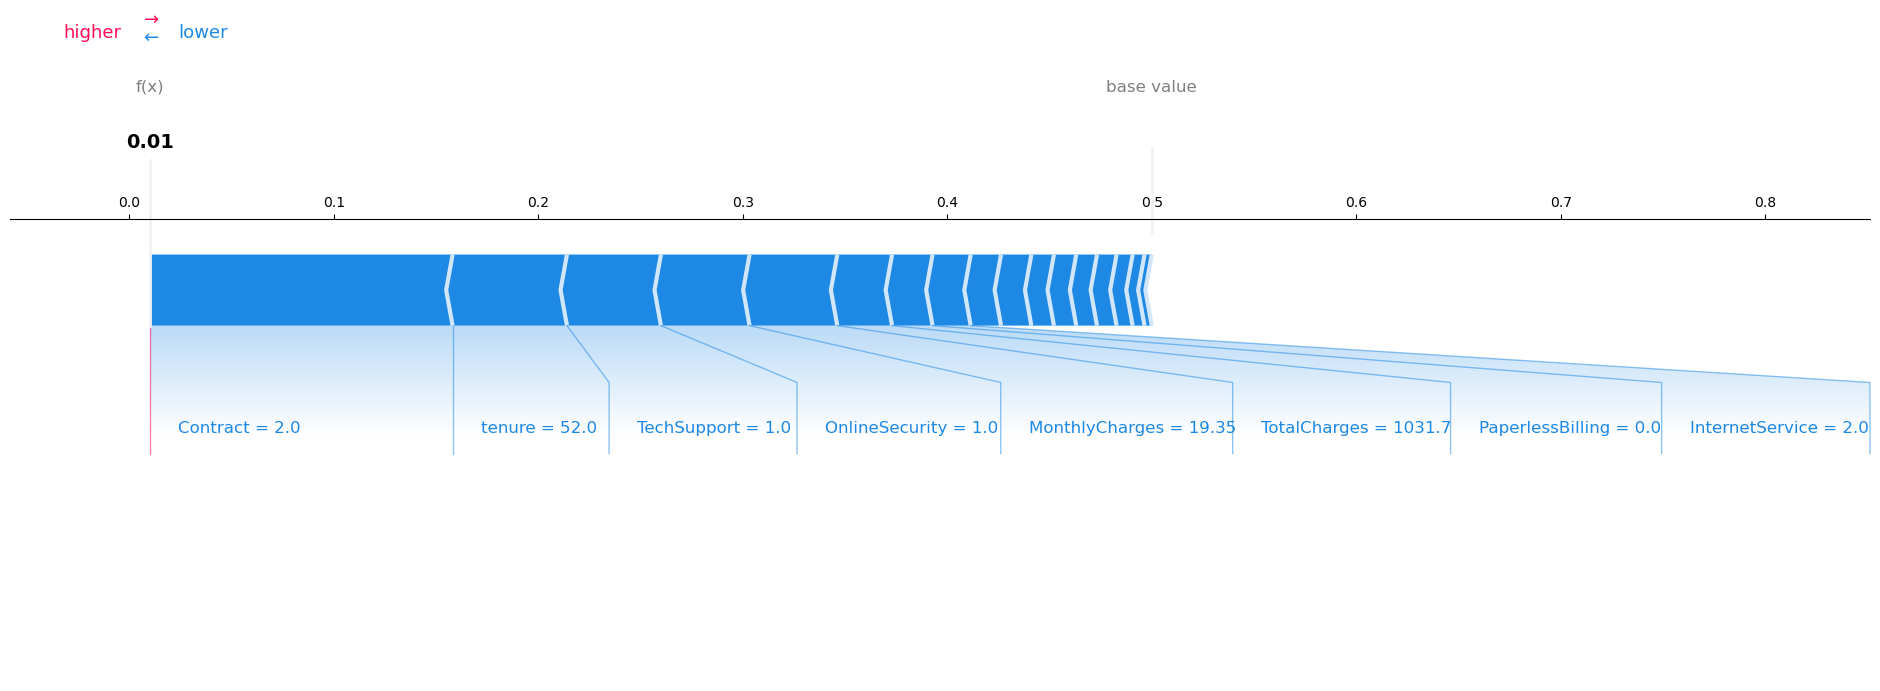

Printing SHAP plots for IBM dataset and XGB classifier
------------------------------------


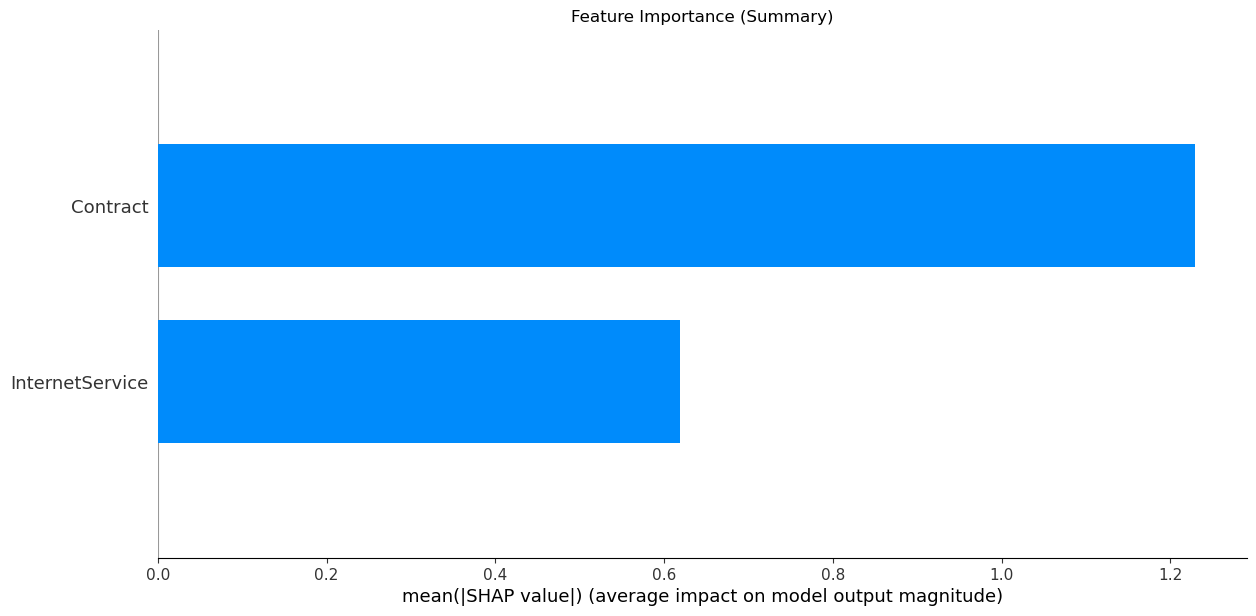

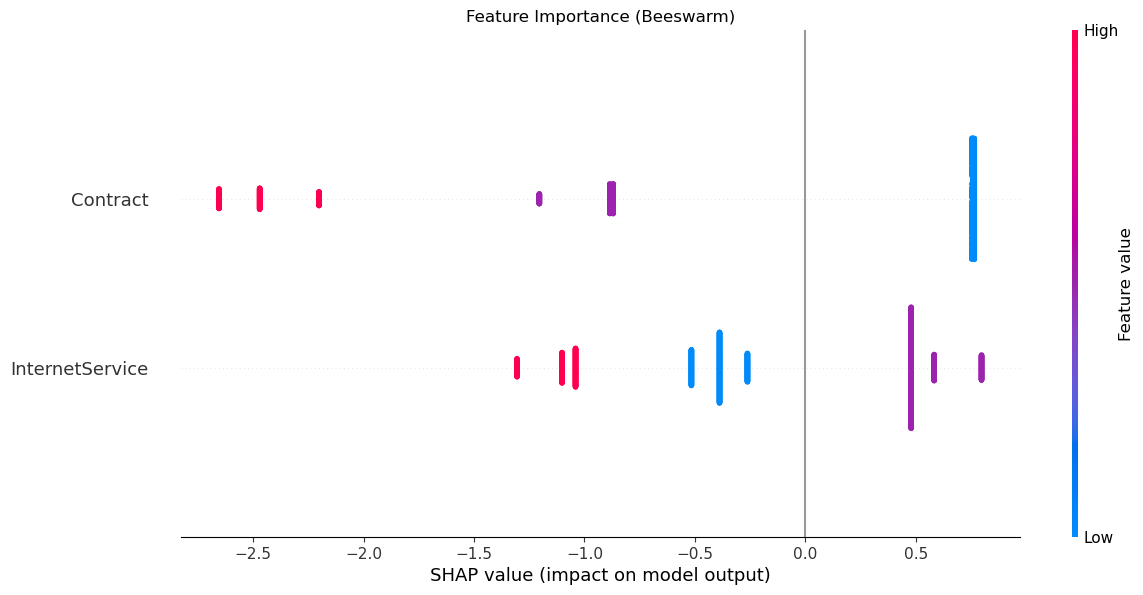

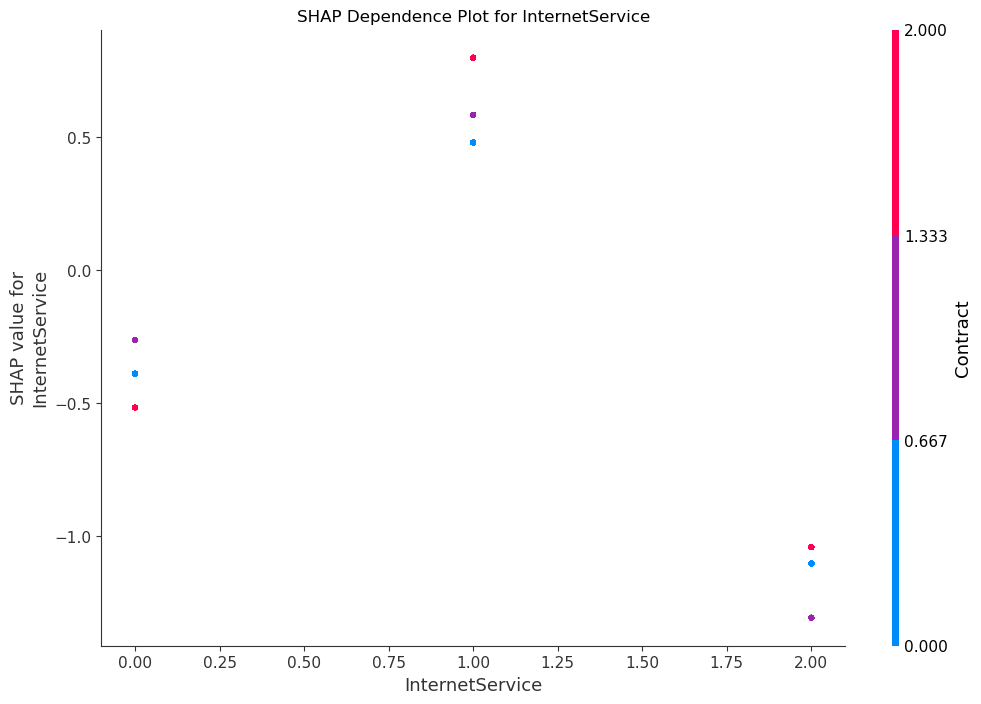

e:\Anaconda\envs\ml_new_vers\Lib\site-packages\shap\plots\_force_matplotlib.py:101: RuntimeWarning: divide by zero encountered in scalar divide
  feature_contribution = np.abs(float(feature[0]) - pre_val) / np.abs(total_effect)


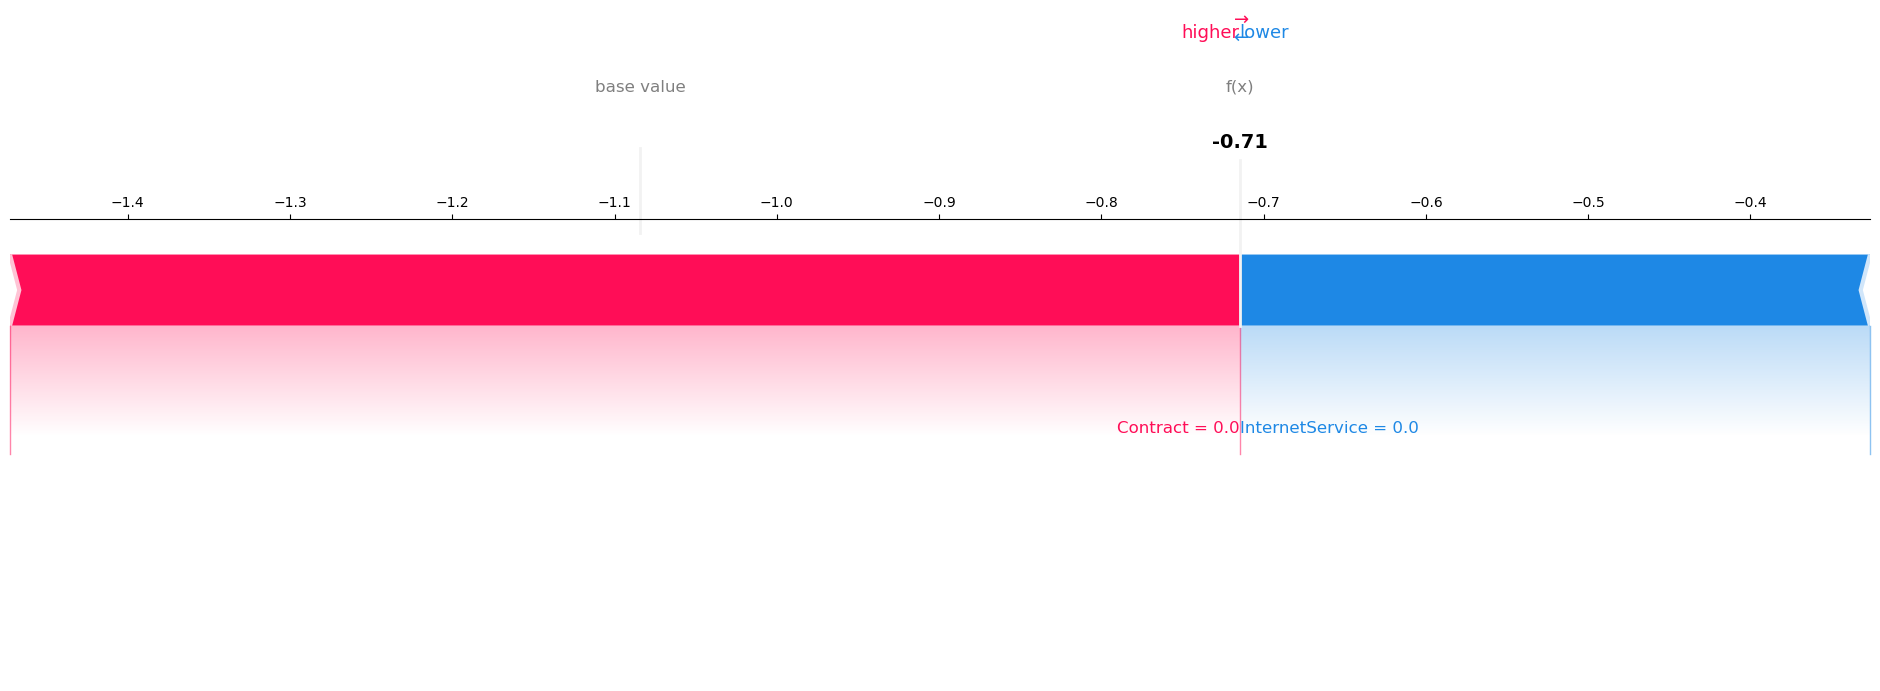

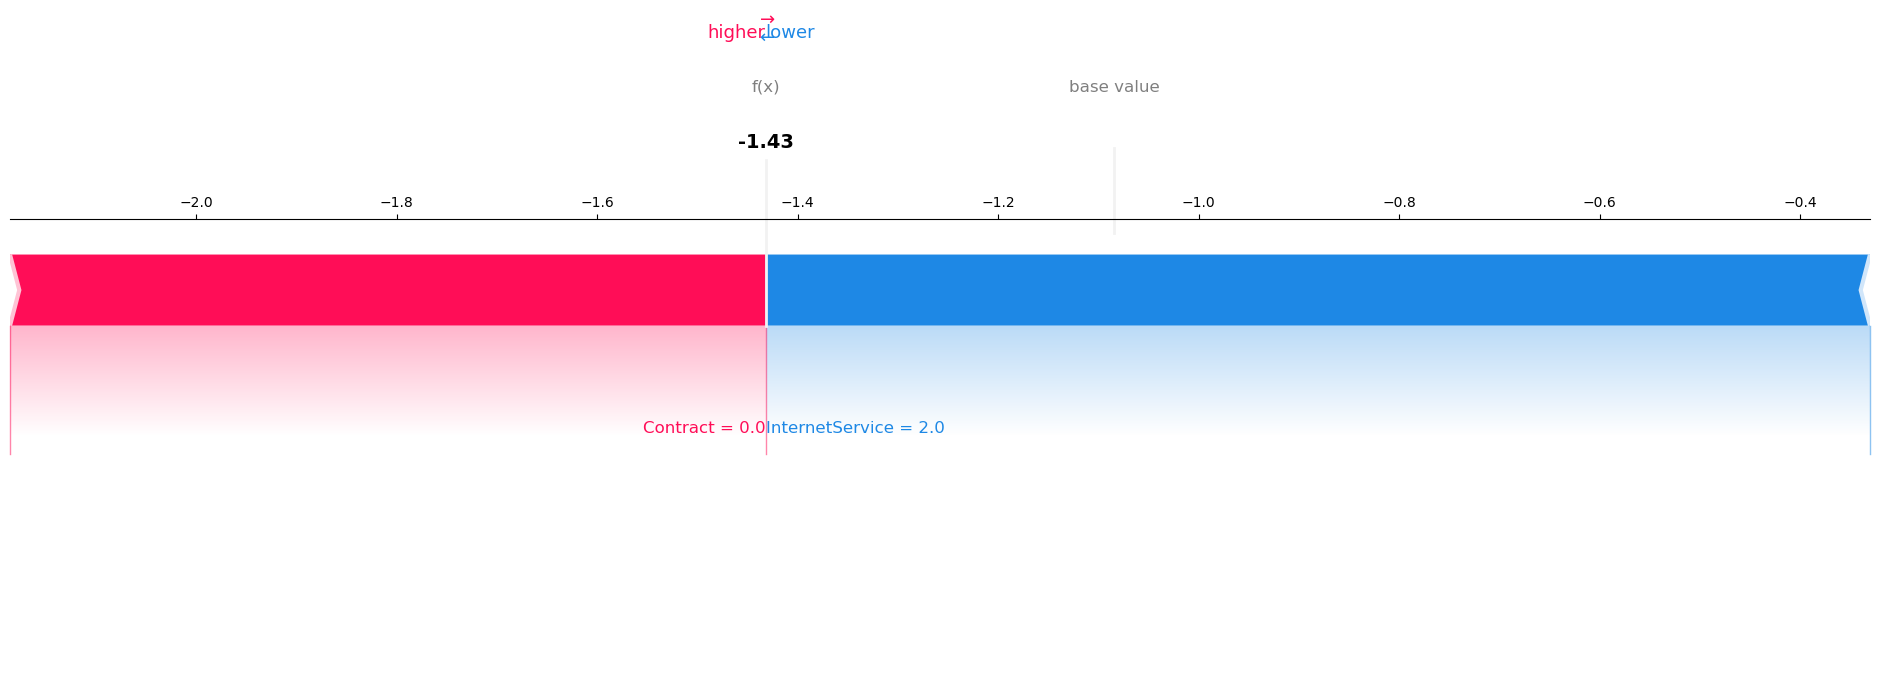

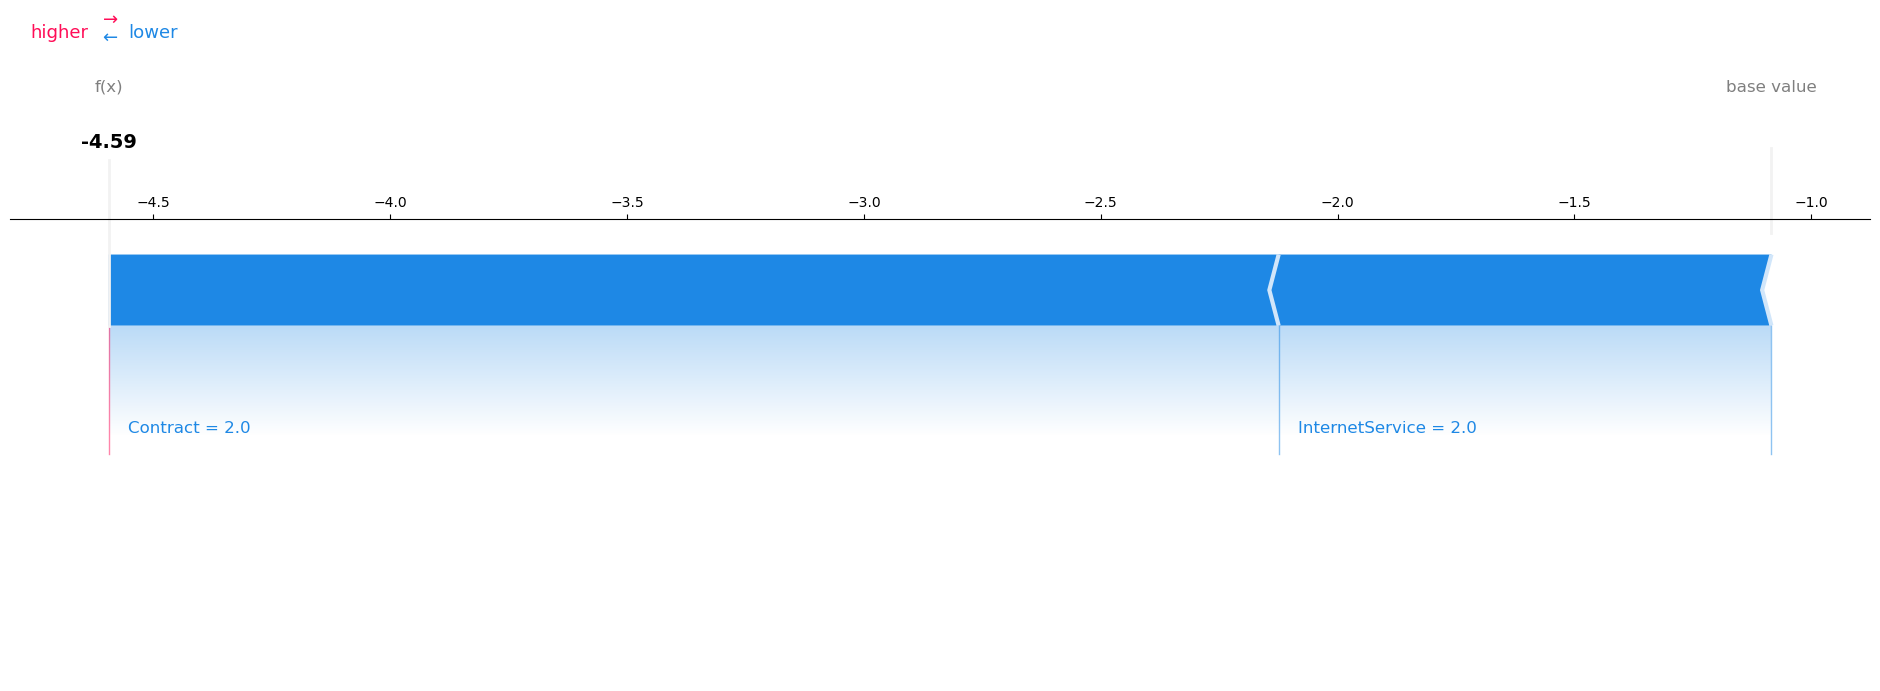

In [78]:
for dataset in datasets:
    for classifier in classifiers:
        print(f'Printing SHAP plots for {dataset} dataset and {classifier} classifier')
        print('------------------------------------')

        df, features = load_data(dataset, classifier)
        X_train, X_test, y_train, y_test = preprocess_data(df, features)
        model = create_model(classifier)
        model = train_model(model, X_train, y_train)
        shap_values, explainer = calculate_shap_values(model, X_test)
        if isinstance(model, BalancedRandomForestClassifier) or isinstance(model, RandomForestClassifier):
            explainer.expected_value = explainer.expected_value[1]
            shap_values = shap_values[:,:,1]

        # SHAP summary plot
        generate_summary_plot(shap_values, classifier, X_test)
        # SHAP beeswarm plot
        generate_beeswarm_plot(shap_values, X_test)
        # Generate the dependence plot for a specific feature
        generate_dependence_plot(shap_values, X_test, X_test.columns[0]) #for the 1st feature, modify it as needed
        # SHAP force plot
        generate_force_plot(explainer, shap_values, X_test, [0, 1, 2])